In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

In [40]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/avocado.csv')
df.head(5)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [41]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [42]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [43]:
for i in df:
    un=df[i].unique().size
    print(i,un)

Unnamed: 0 53
Date 169
AveragePrice 259
Total Volume 18237
4046 17702
4225 18103
4770 12071
Total Bags 18097
Small Bags 17321
Large Bags 15082
XLarge Bags 5588
type 2
year 4
region 54


In [44]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [45]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [46]:
df.describe(percentiles=[0],datetime_is_numeric=False)

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
0%         0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
0%     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
0%      2015.000000  
50%     2016.000000  
max     2018.000000

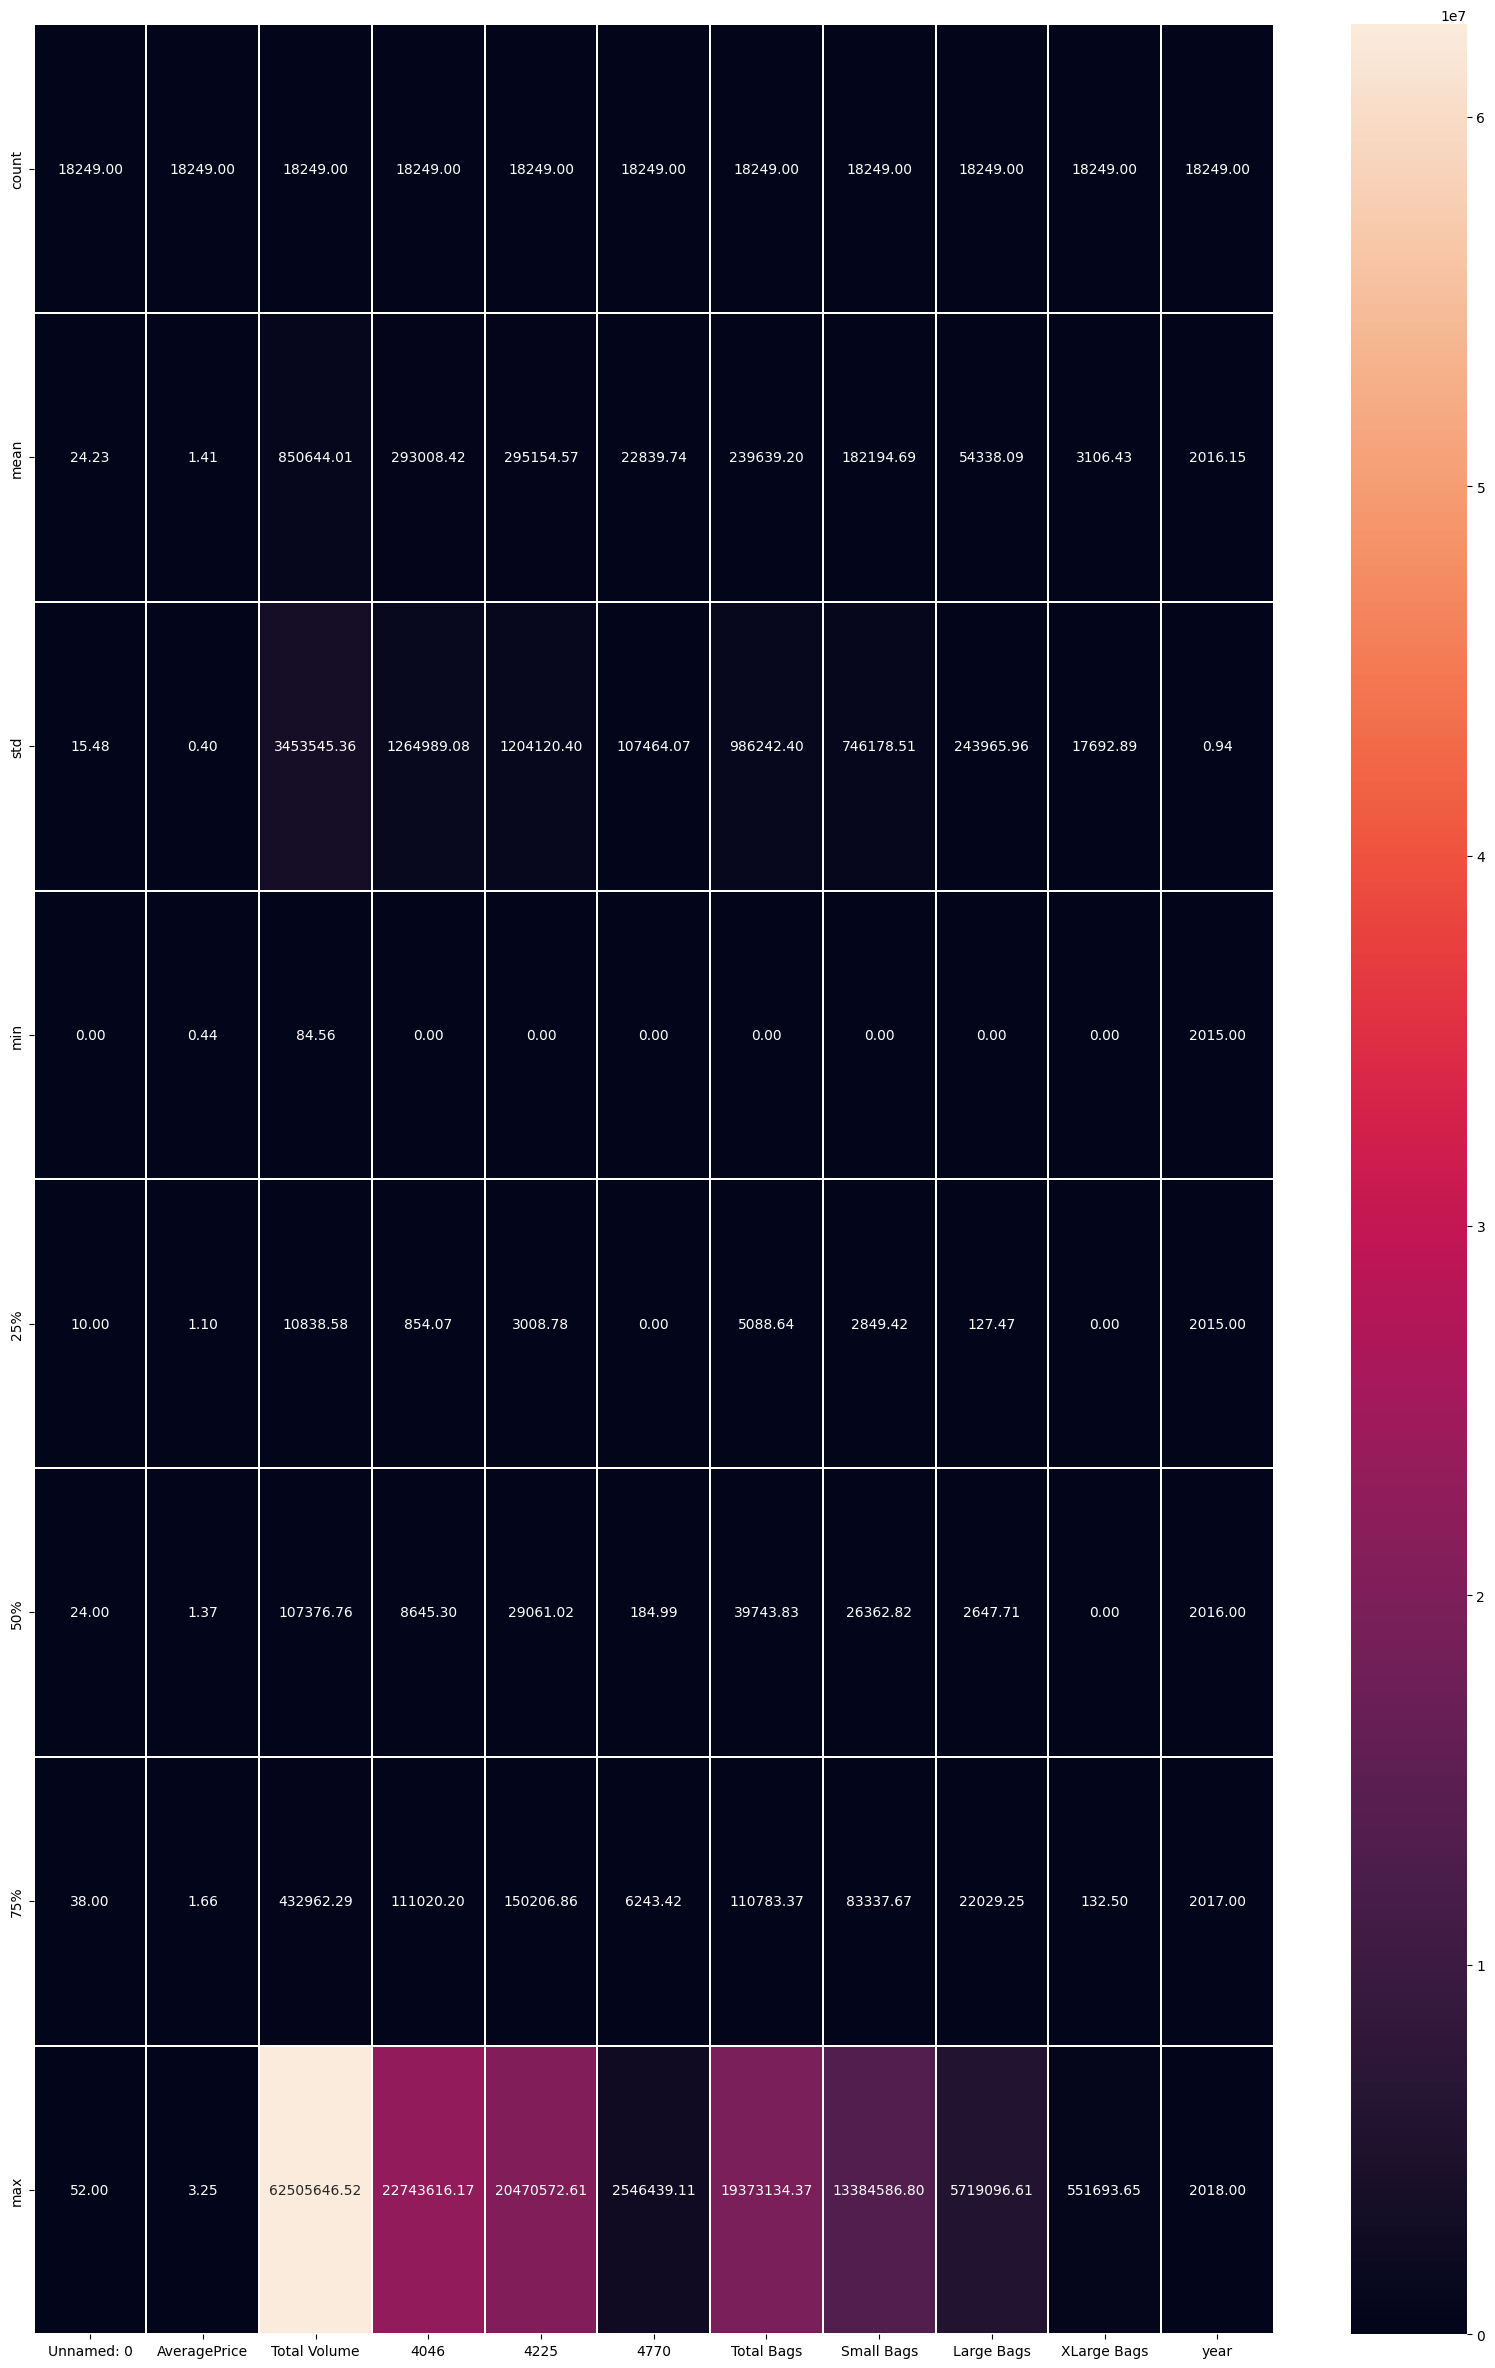

In [47]:
plt.figure(figsize=(20,30))
sns.heatmap(df.describe(),linecolor='white',linewidths=0.1,fmt='0.2f',annot=True)
plt.show()

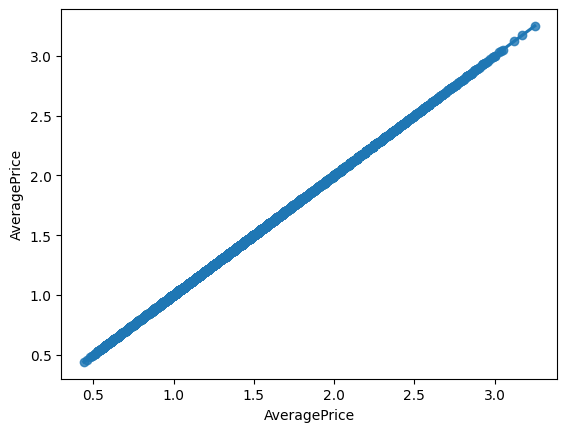

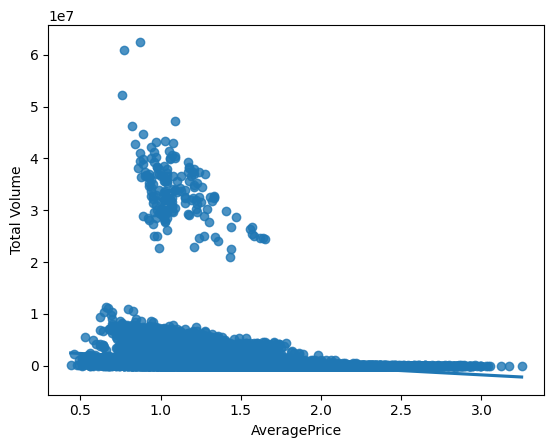

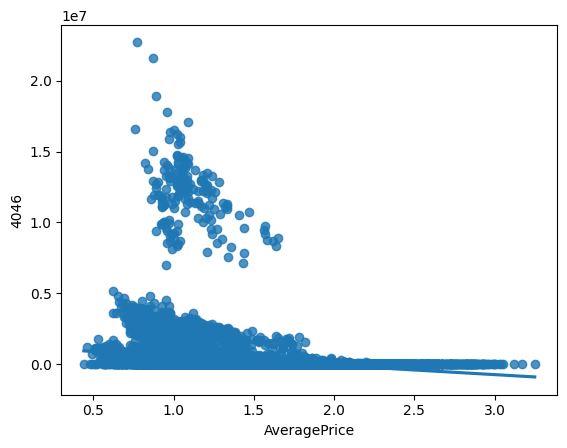

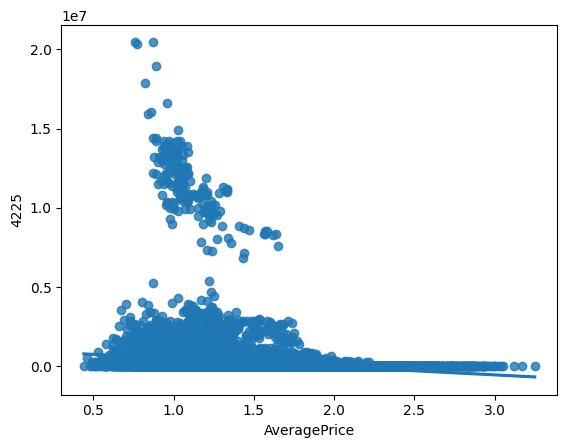

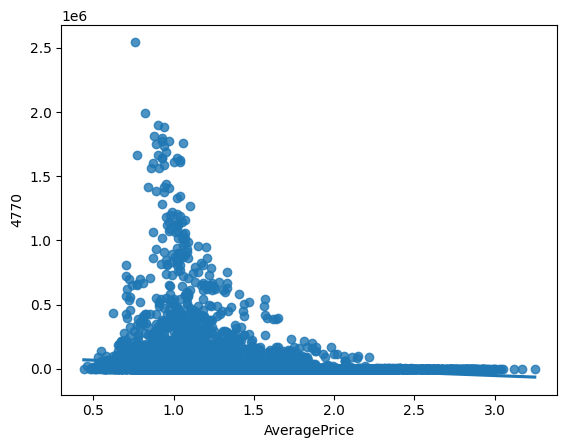

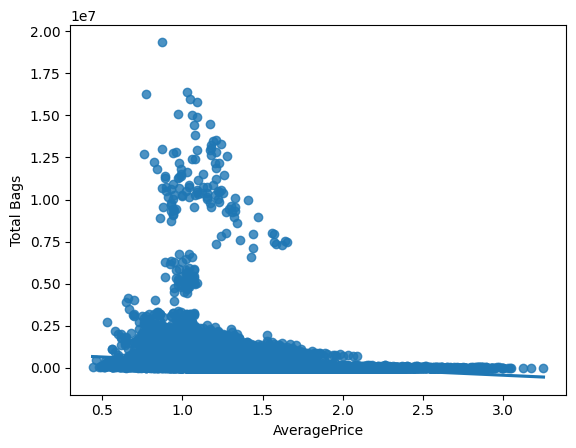

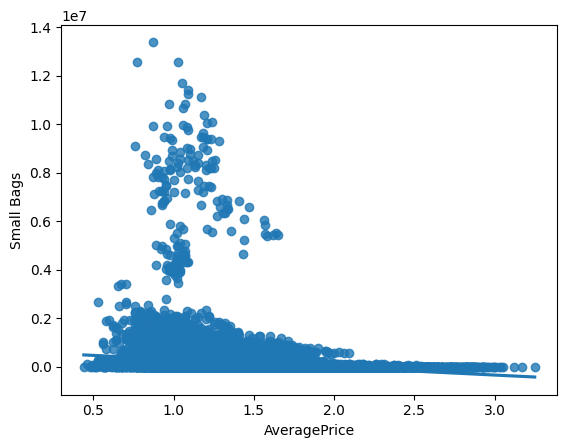

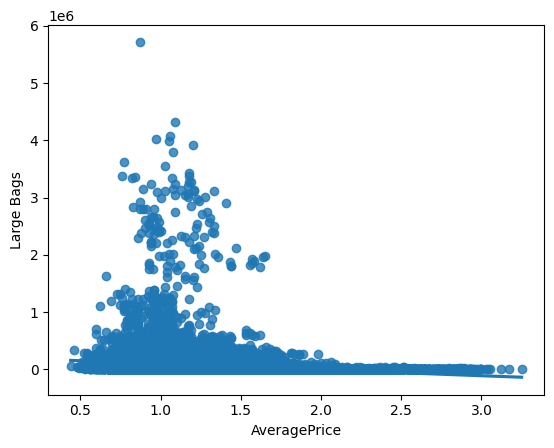

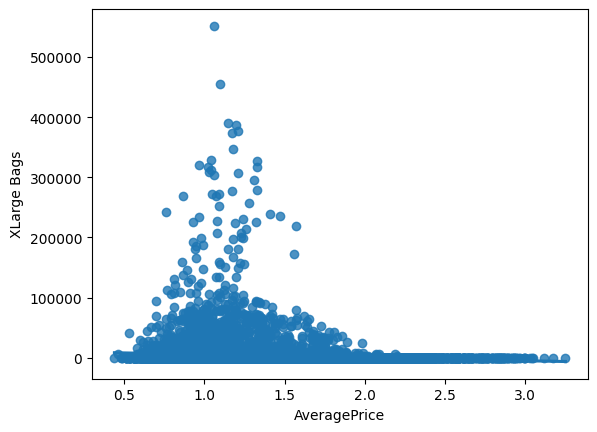

In [48]:
for i in df:
    if df[i].dtype=='int' or df[i].dtype=='float':
        sns.regplot(df,x='AveragePrice',y=i)
        plt.show()
    else: pass    

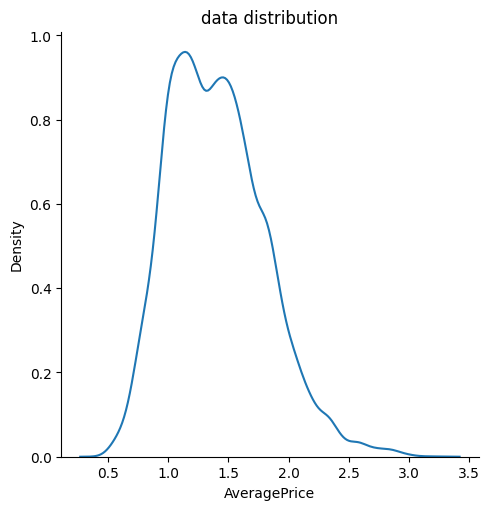

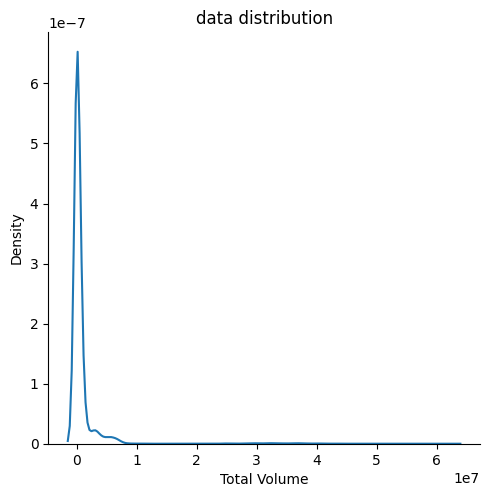

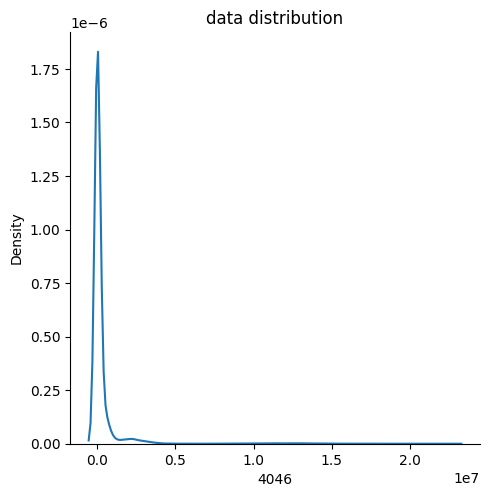

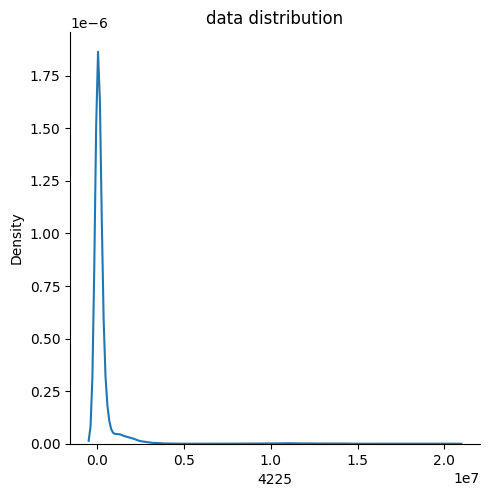

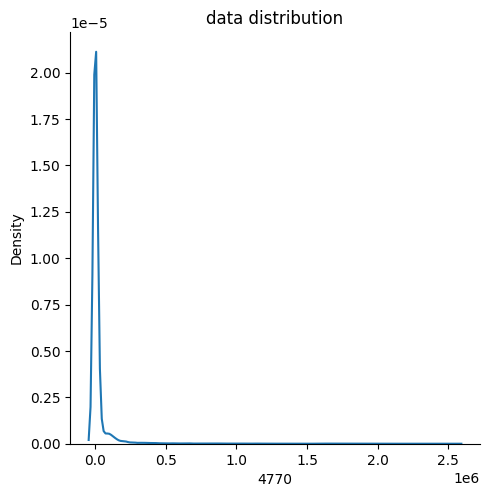

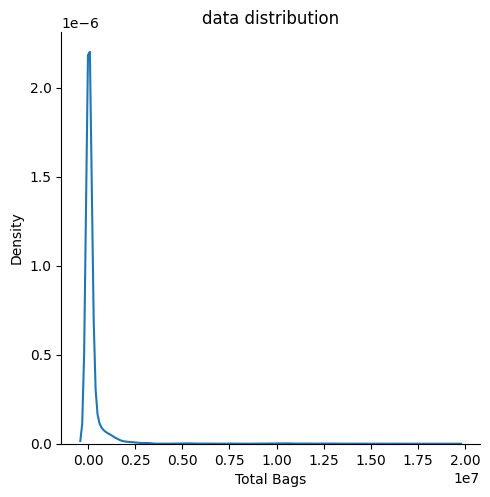

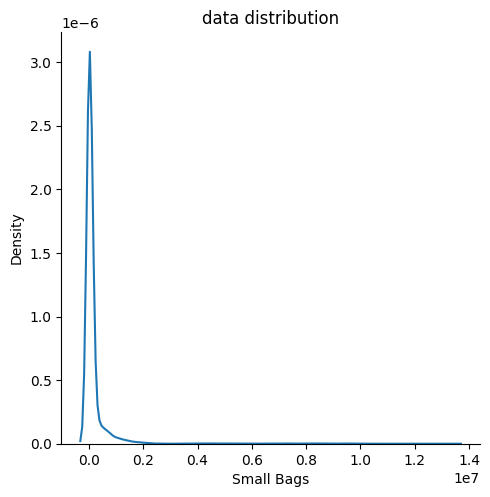

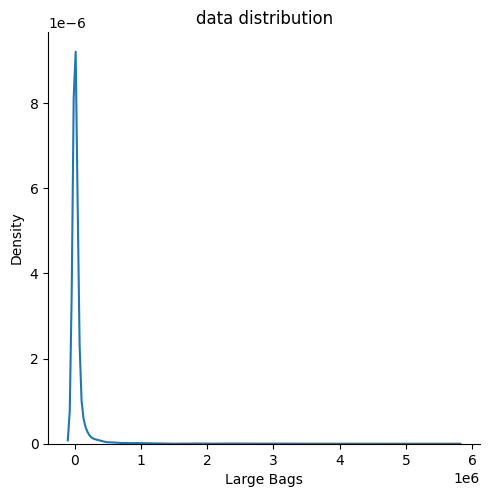

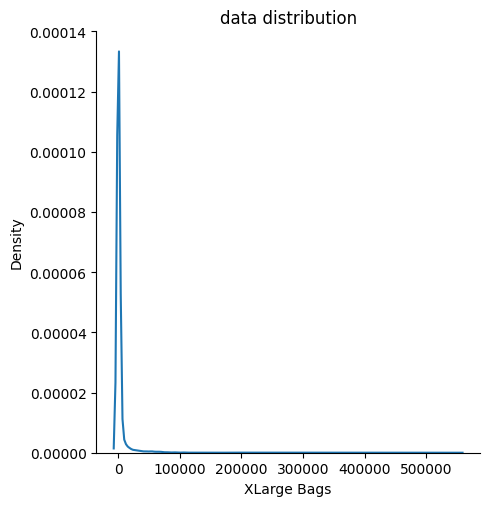

In [49]:
for i in df:
    if df[i].dtype=='int' or df[i].dtype=='float':
        sns.displot(df,x=i,kind='kde')
        plt.xlabel(i)
        plt.title('data distribution')
        plt.show()
    else: pass 

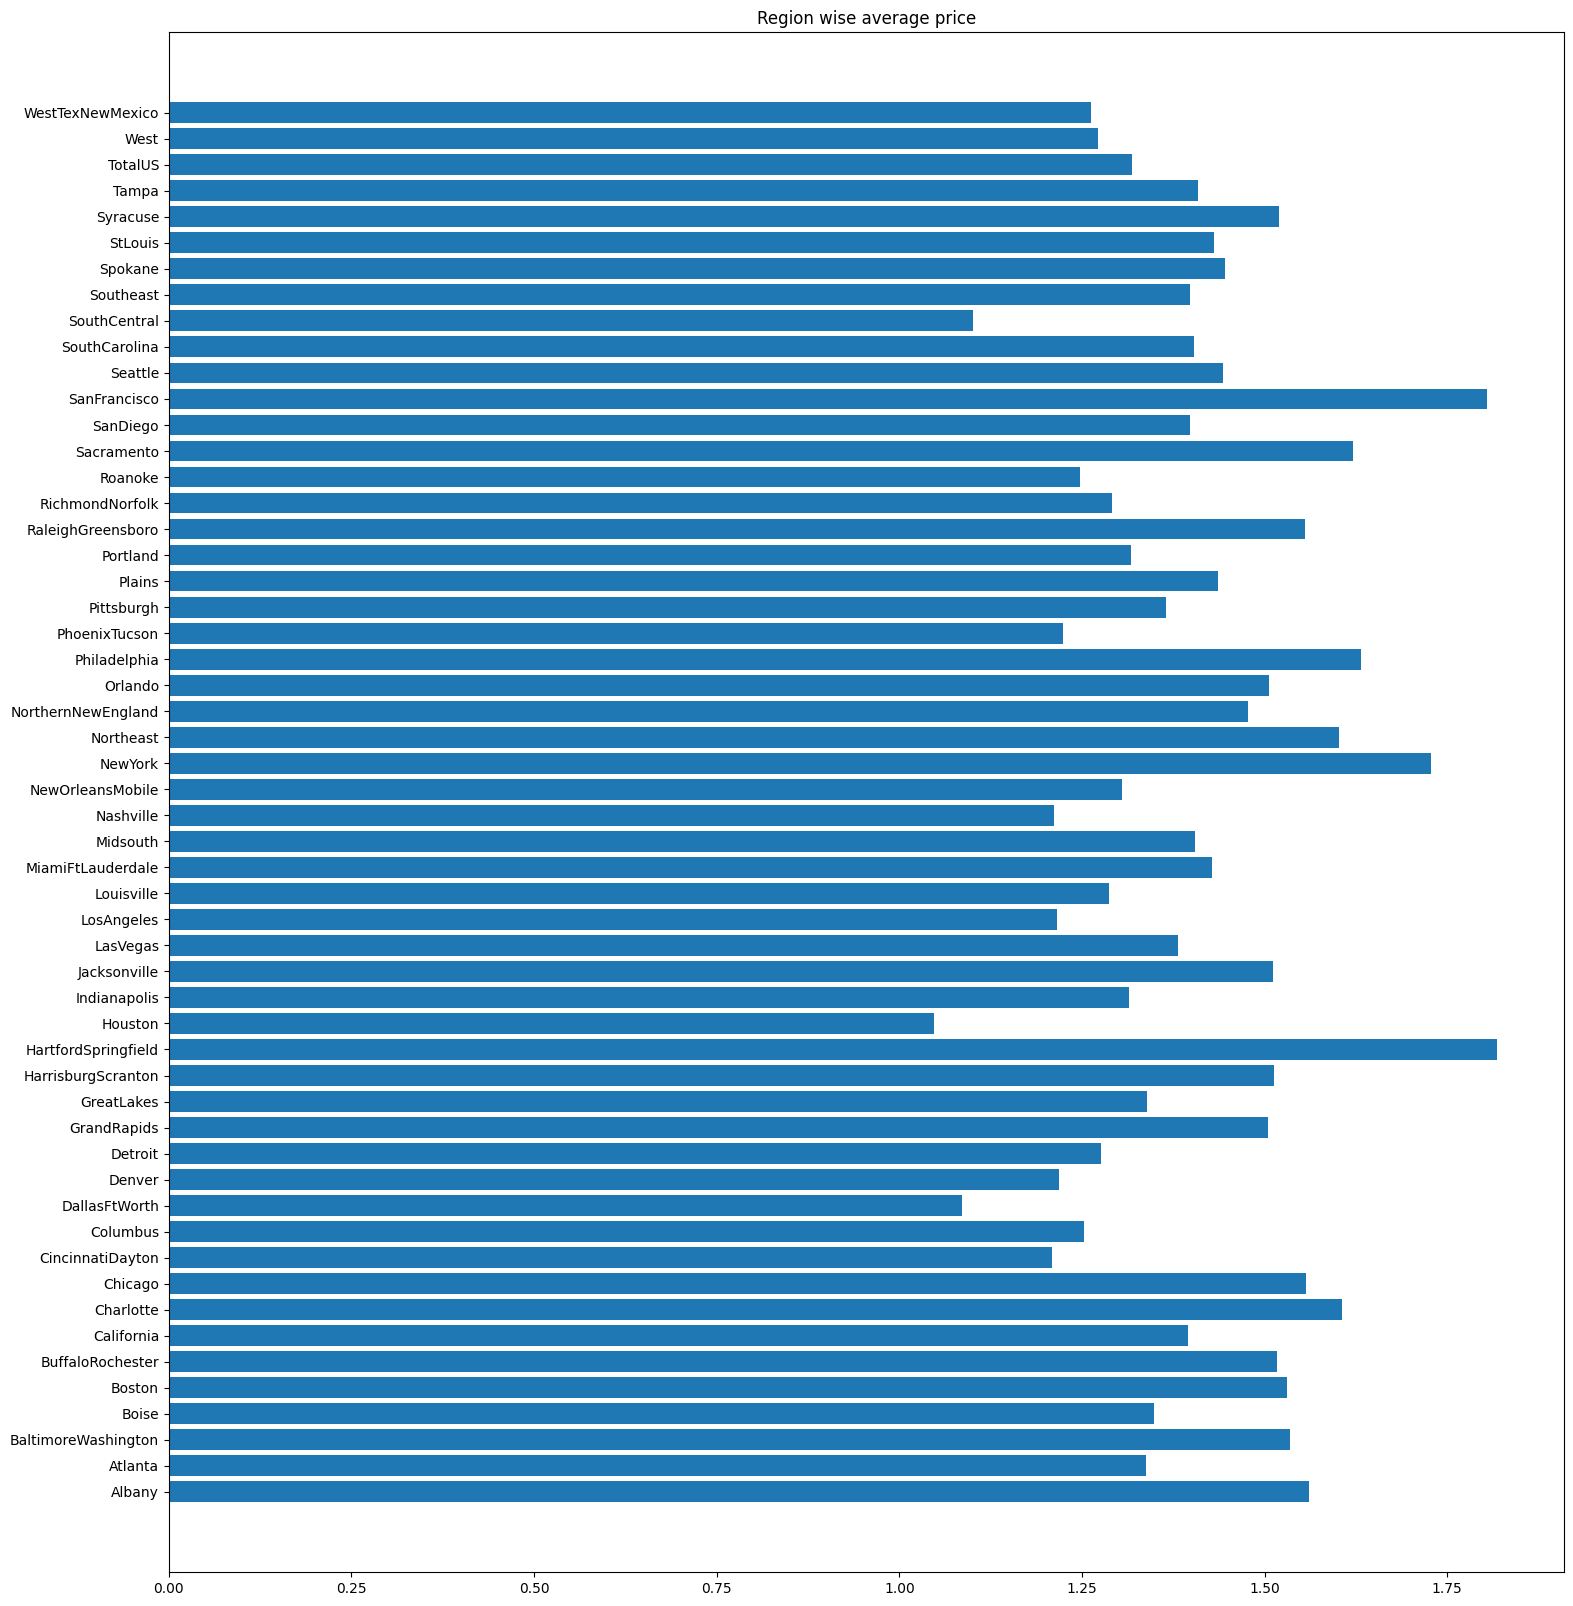

In [50]:
pivot=pd.pivot_table(df,values='AveragePrice',index='region',aggfunc=np.mean)
plt.figure(figsize=(18,20))
plt.barh(y=pivot.index,width=pivot['AveragePrice'])
plt.title('Region wise average price')
plt.show()

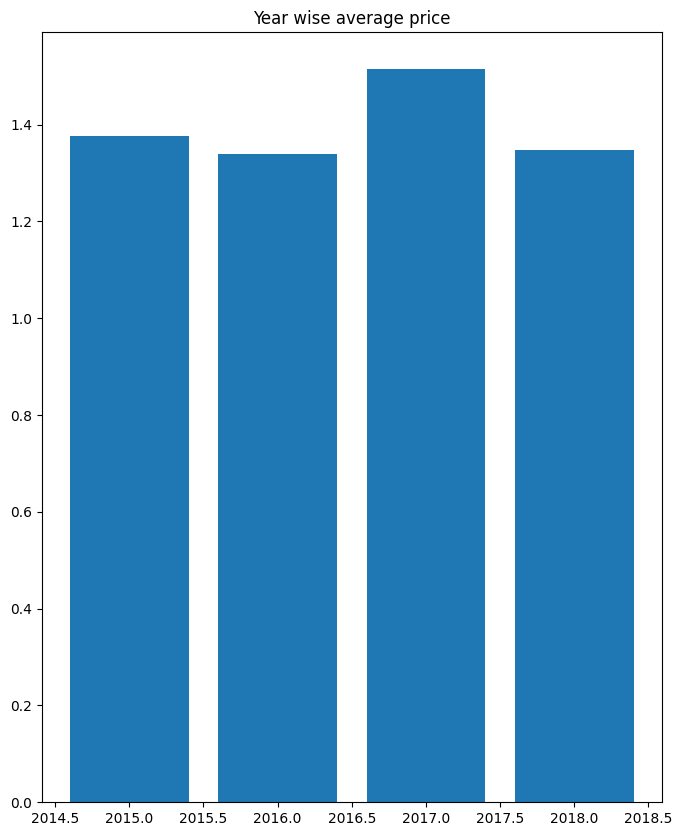

In [51]:
pivot_year=pd.pivot_table(df,values='AveragePrice',index='year',aggfunc=np.mean)
plt.figure(figsize=(8,10))
plt.bar(x=pivot_year.index,height=pivot_year['AveragePrice'])
plt.title('Year wise average price')
plt.show()

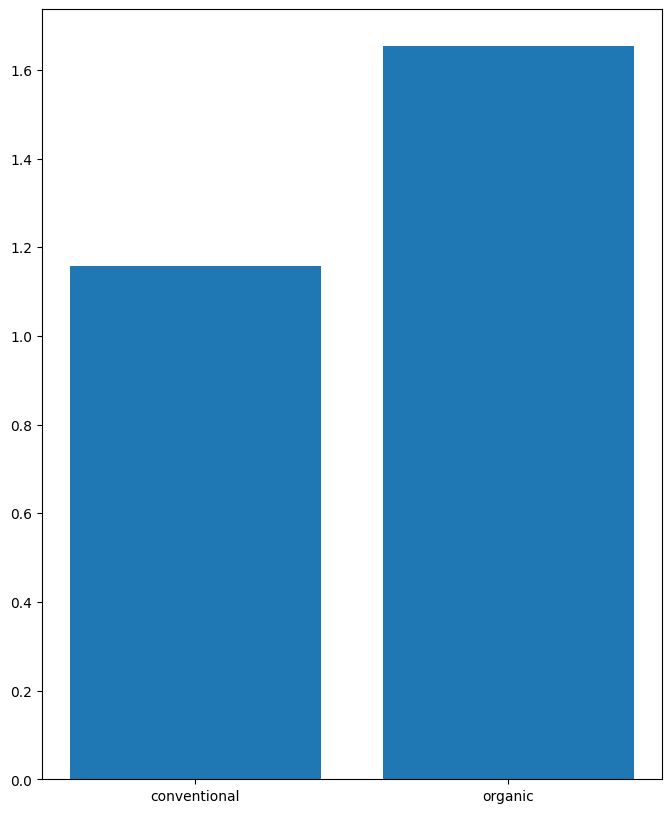

In [52]:
pivot_year=pd.pivot_table(df,values='AveragePrice',index='type',aggfunc=np.mean)
plt.figure(figsize=(8,10))
plt.bar(x=pivot_year.index,height=pivot_year['AveragePrice'])
plt.show()

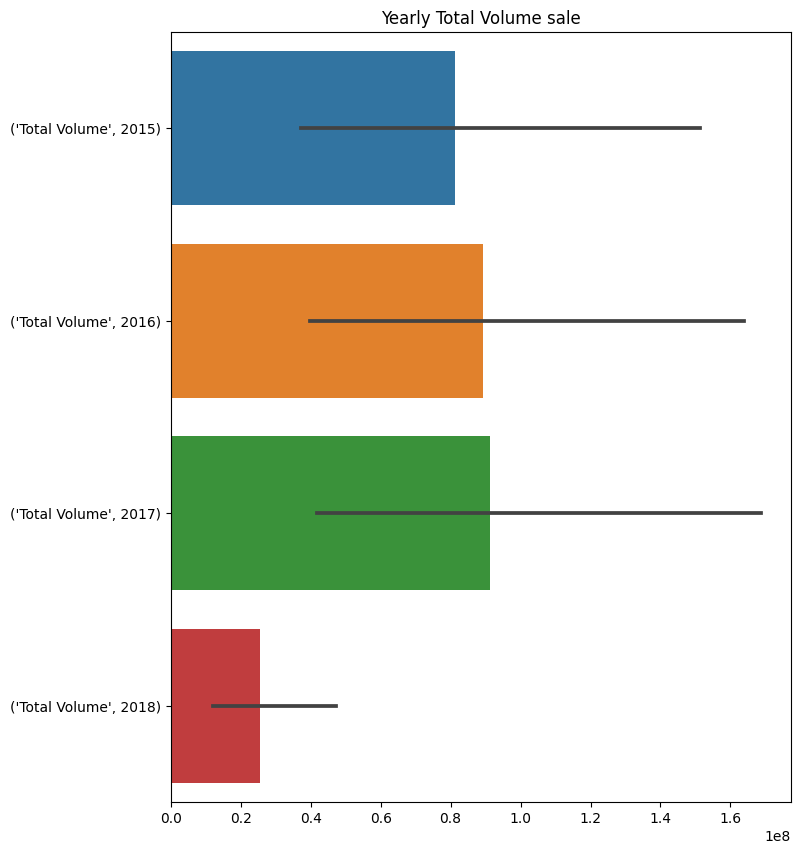

In [53]:
pivot_3=pd.pivot_table(df,index=['region'],columns=['year'],values=['Total Volume'],aggfunc=np.sum)
plt.figure(figsize=(8,10))
sns.barplot(pivot_3,orient='h')
plt.title('Yearly Total Volume sale')
plt.show()

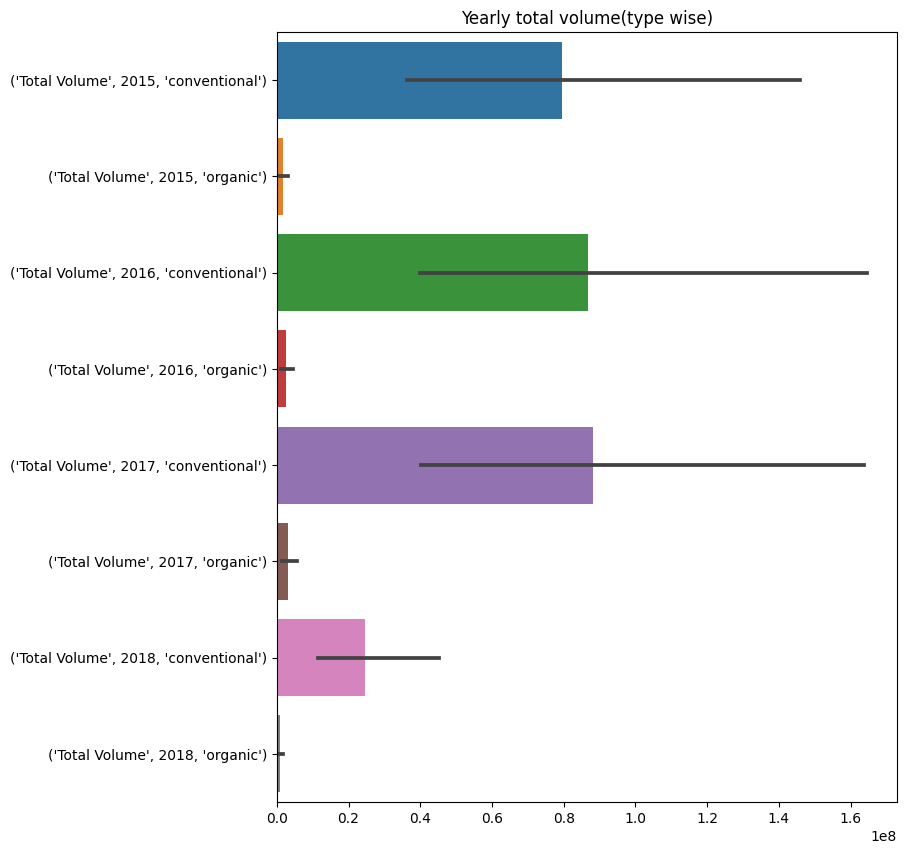

In [54]:
pivot_4=pd.pivot_table(df,index=['region'],columns=['year','type'],values=['Total Volume'],aggfunc=np.sum)
plt.figure(figsize=(8,10))
sns.barplot(pivot_4,orient='h')
plt.title('Yearly total volume(type wise)')
plt.show()

In [55]:
df.columns

## After analysis we can drop the below column-
## 1) Date- As we have yearly sum, so date may influence the analysis
## 2) Unnamed- We donot have any clue about the column
avocado=df.drop(columns=['Date','Unnamed: 0'])

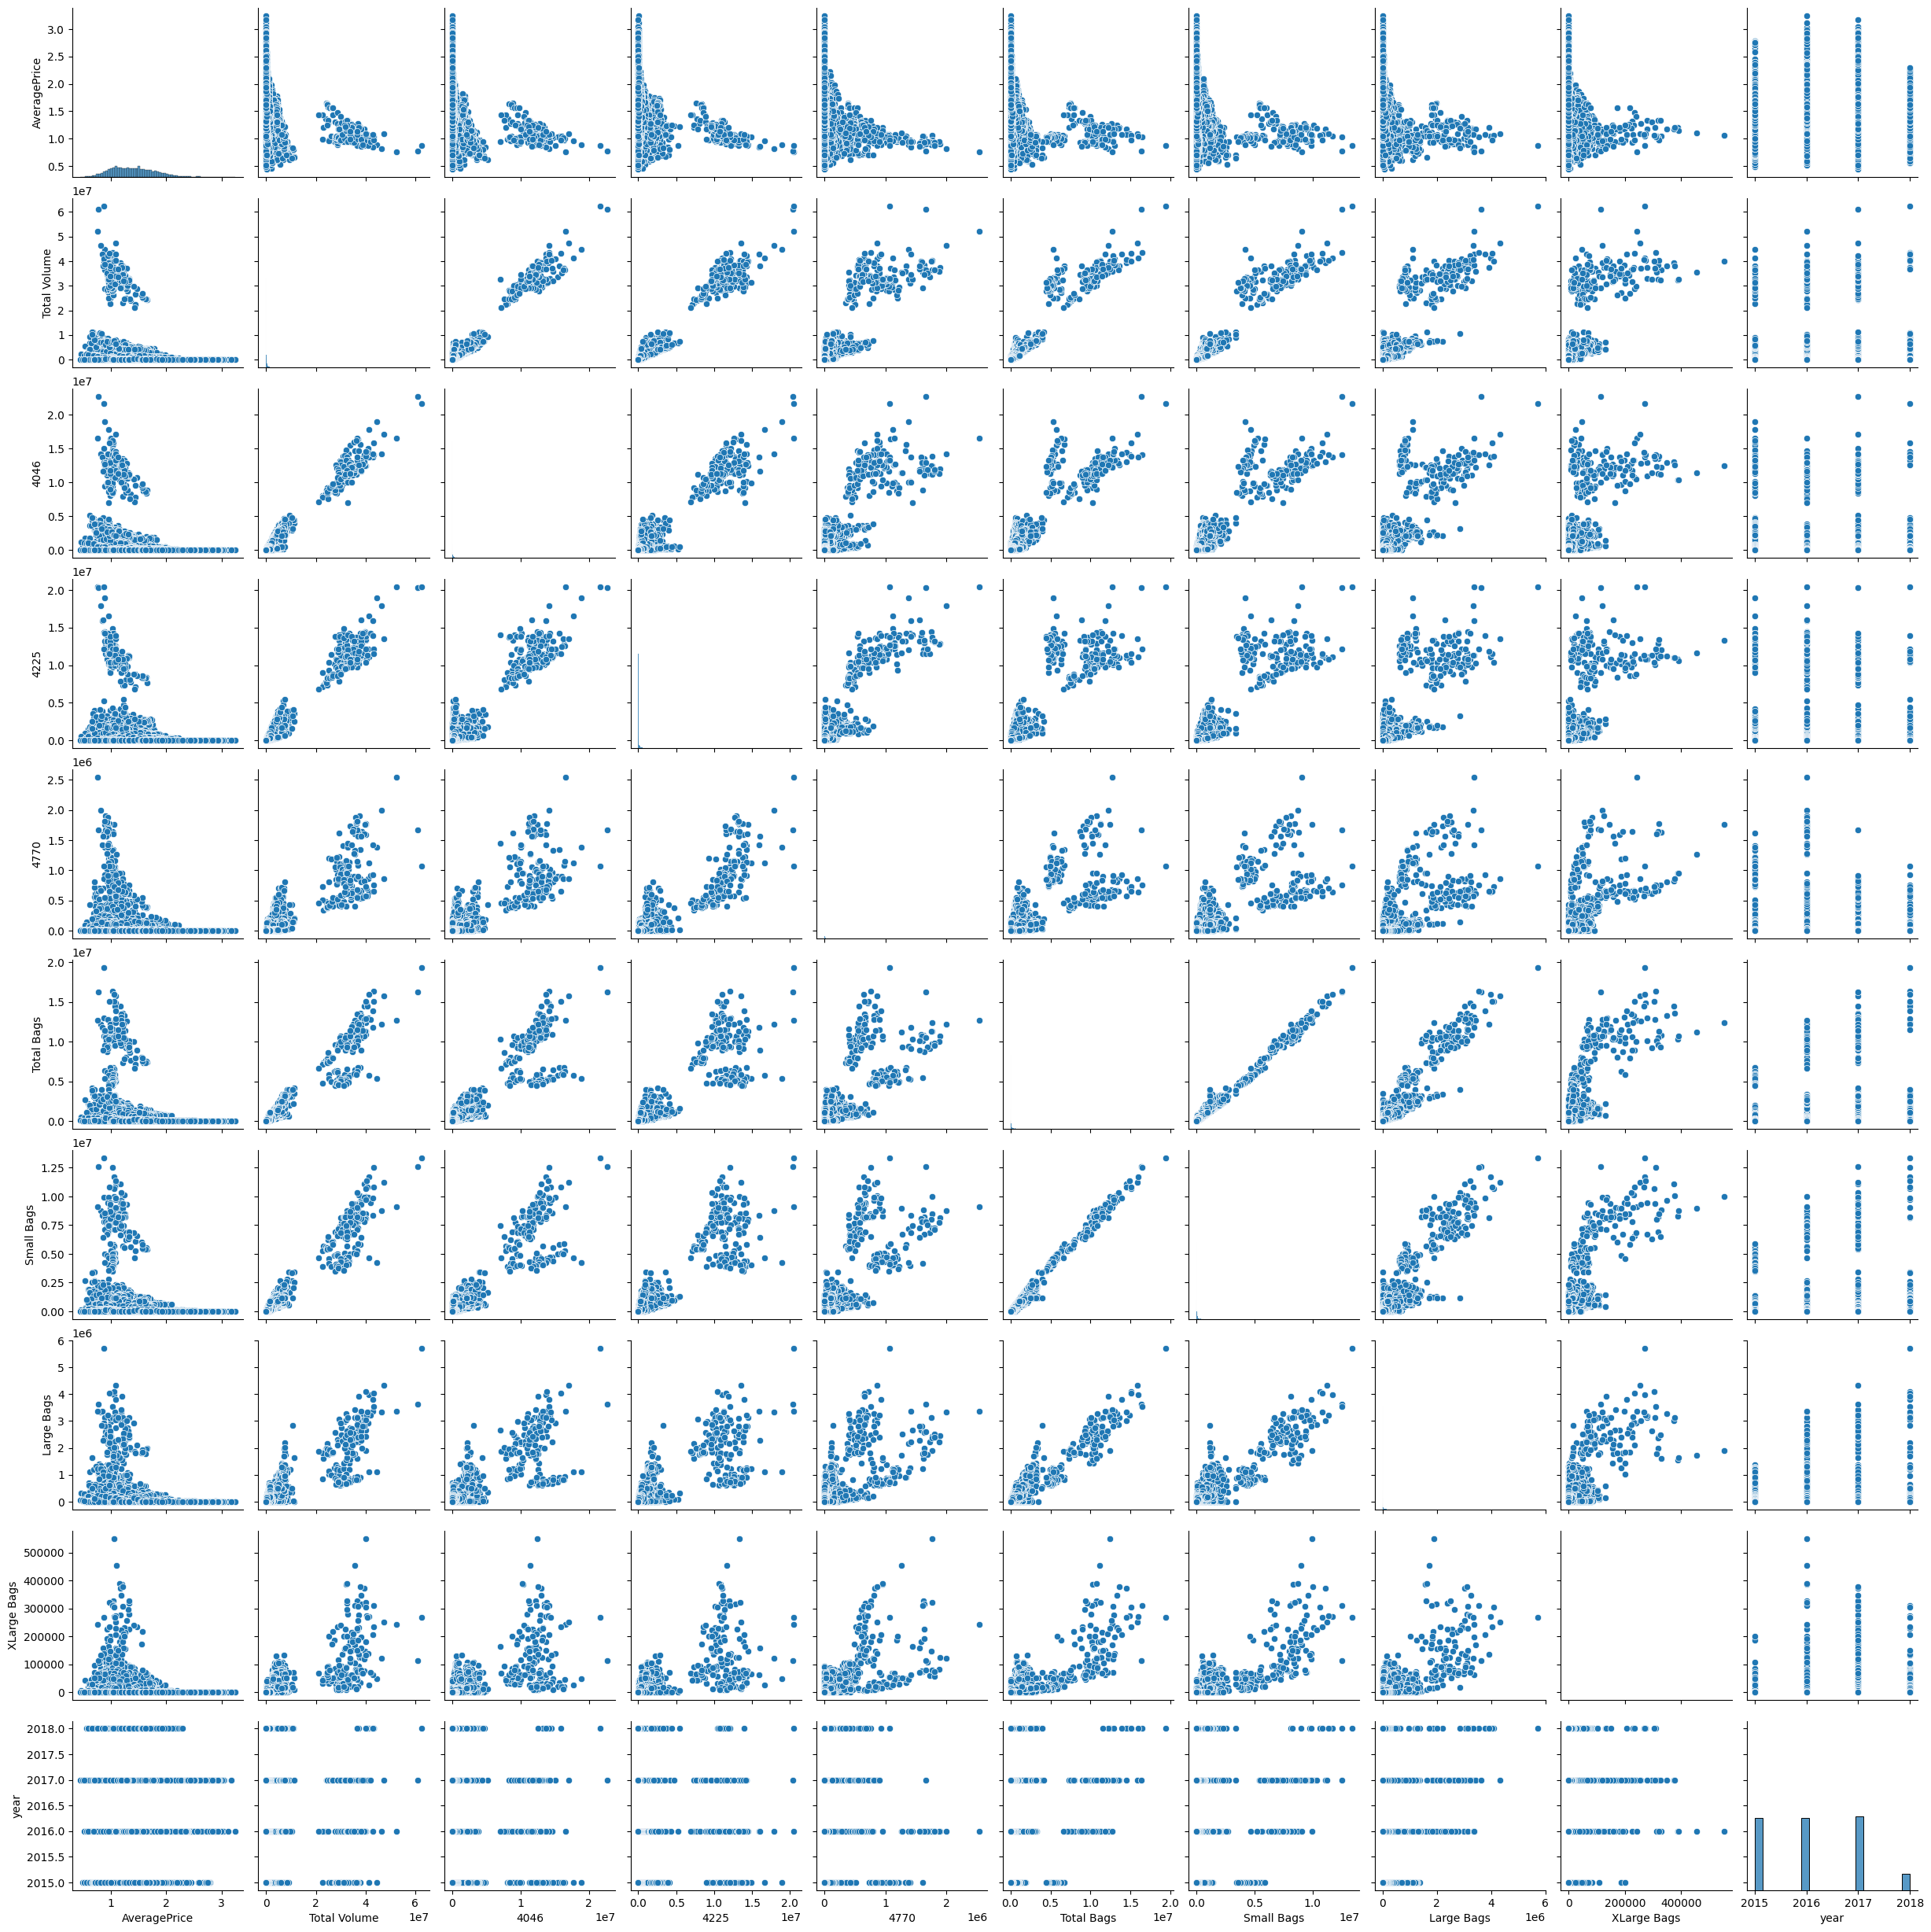

In [56]:
sns.pairplot(avocado)

In [57]:
## Transforming the object value into numaric value:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for column in avocado:
    if avocado[column].dtype==object:
        oe=OrdinalEncoder()
        avocado[column]=oe.fit_transform(avocado[column].values.reshape(-1,1))
    else:pass 
print(avocado)

       AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  
0         

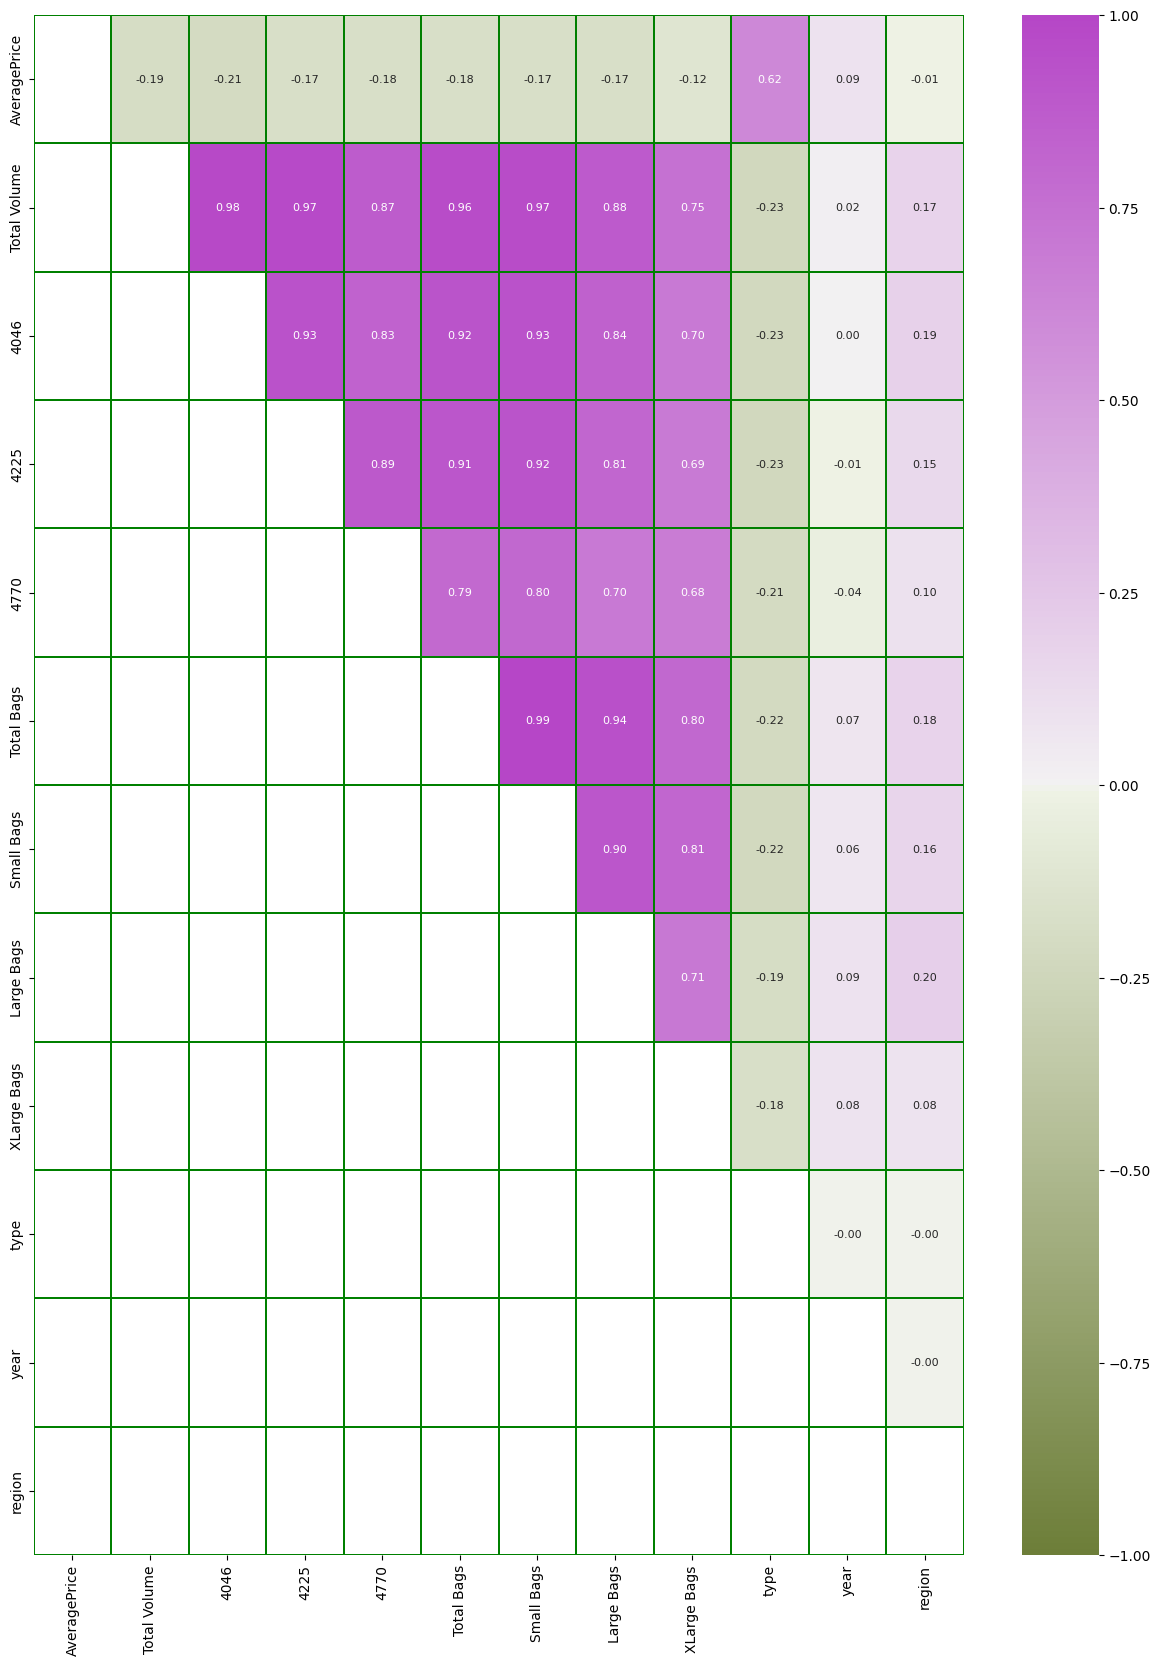

In [58]:
v=avocado.corr()
plt.figure(figsize=(15,20))
mask=np.zeros_like(v)
mask[np.tril_indices_from(mask)]=True
sns.heatmap(v,vmax=1,vmin=-1,annot=True,annot_kws={'fontsize':8},fmt='0.2f',linewidths=0.2,linecolor='green',mask=mask,cmap=sns.diverging_palette(100,300,as_cmap=True))
plt.show()

In [59]:
## Analysis the skew ness and modification
for i in avocado:
    x=avocado[i].skew()
    if x>=5:
        avocado[i]=np.cbrt(avocado[i])
    else:pass
 
print('modified skewness of "Avocado_data" is:')
print('=======================================')
print(avocado.skew())

modified skewness of "Avocado_data" is:
AveragePrice    0.580303
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
type            0.000329
year            0.215339
region          0.000030
dtype: float64


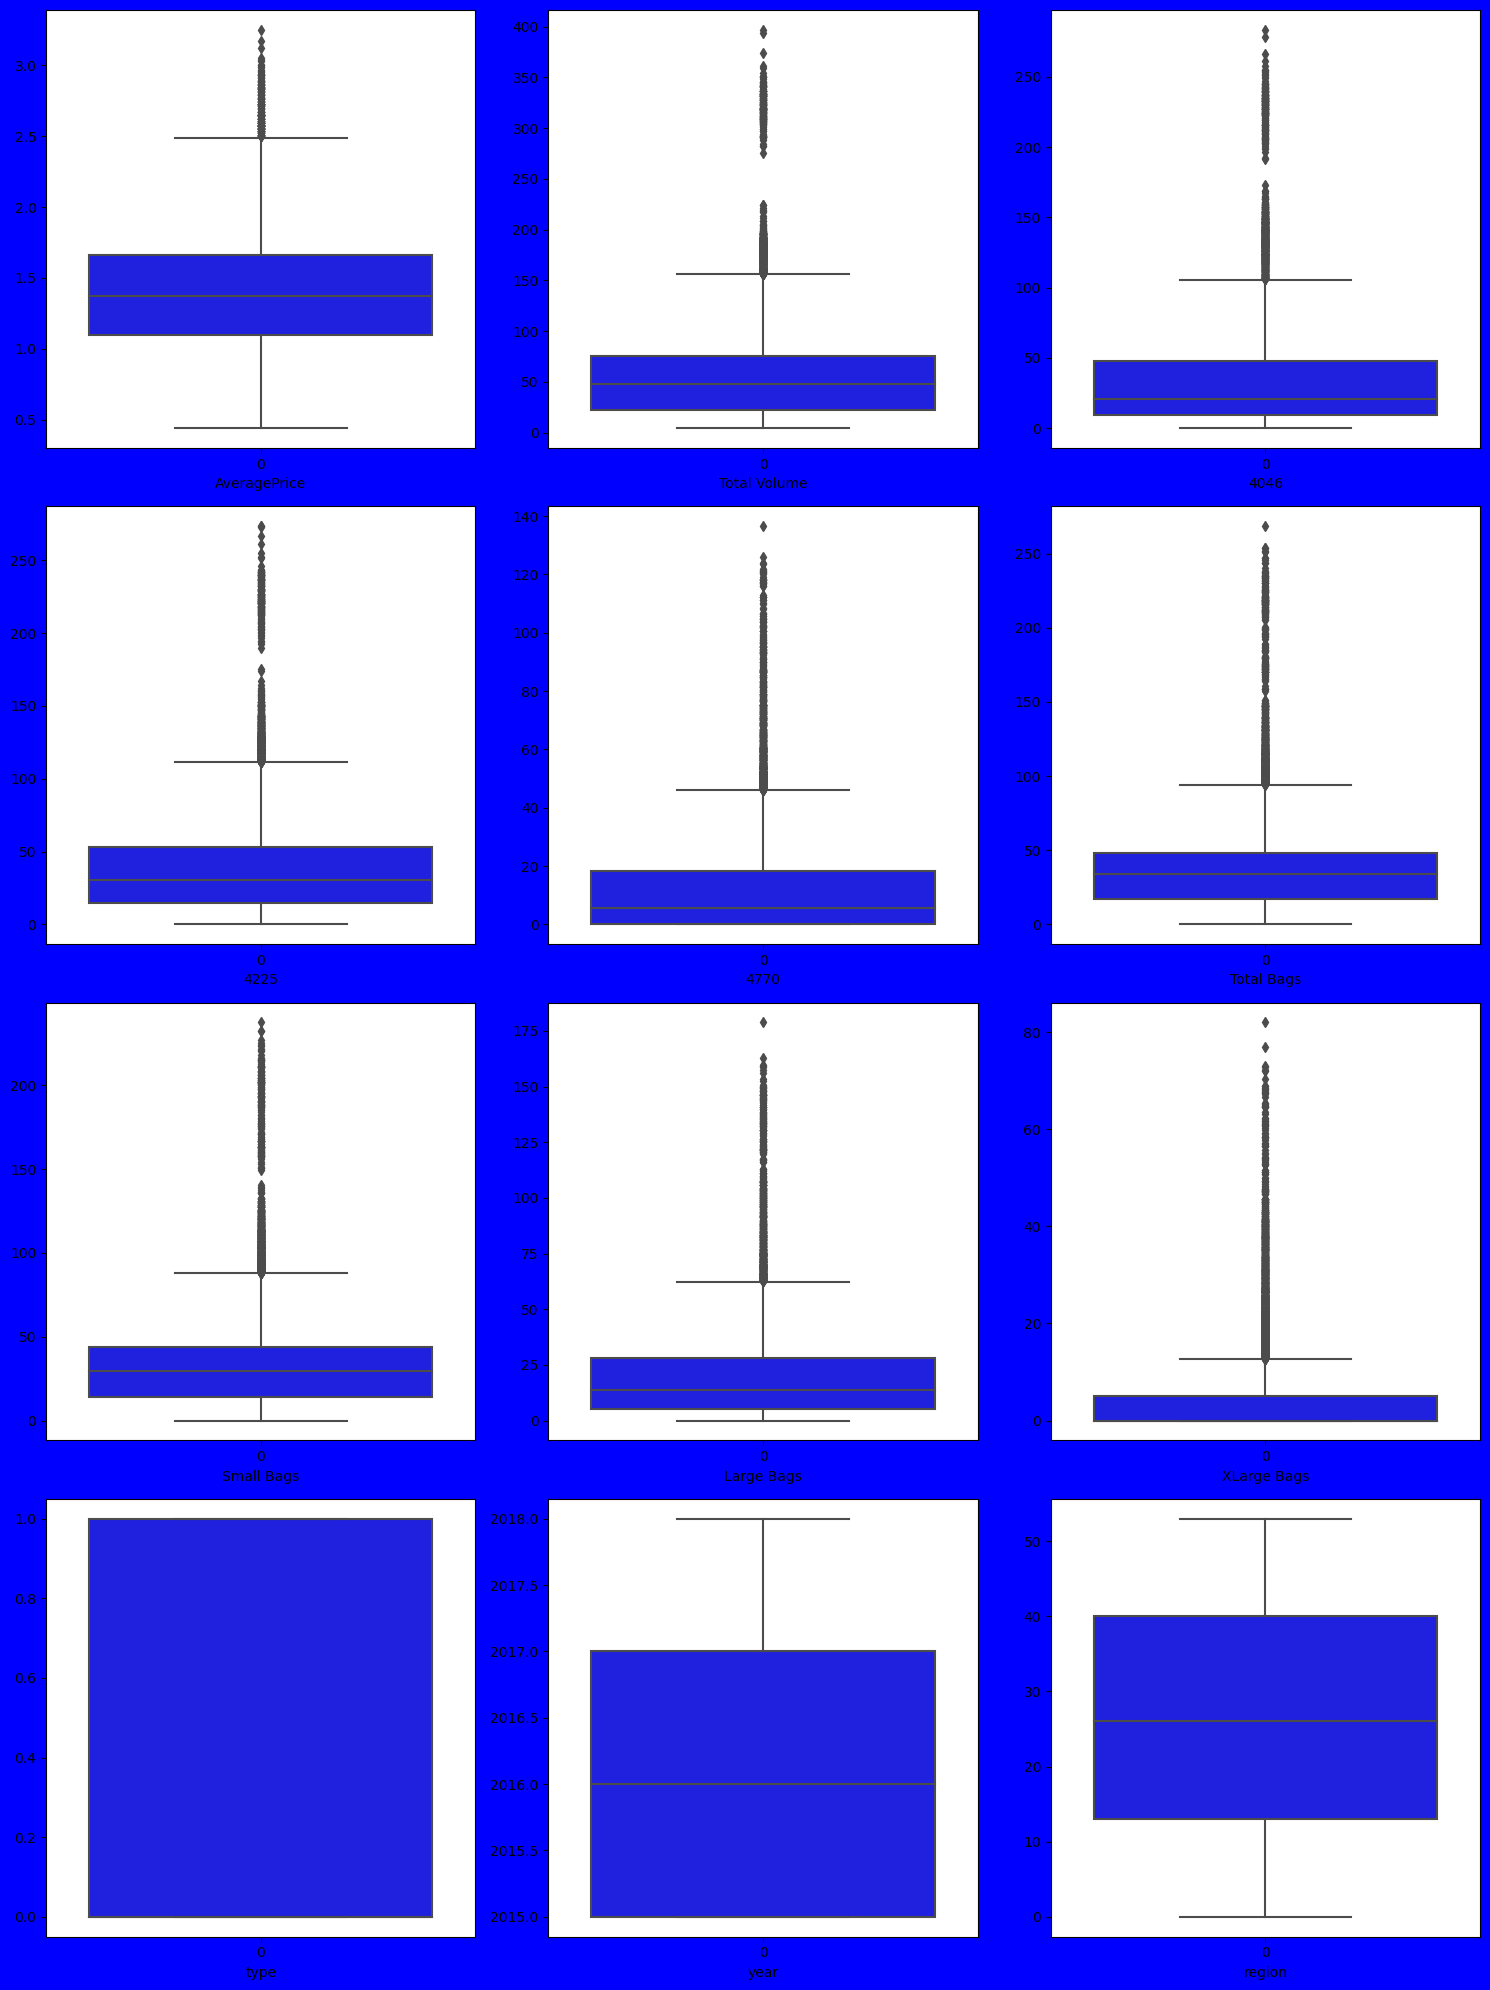

In [60]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in avocado:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(avocado[column],color='blue')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout() 

In [61]:
columns=avocado.columns
out_lier=avocado[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
avocado_z=avocado[(z<3).all(axis=1)]
print('## dataloss:')
print((avocado.shape[0]-avocado_z.shape[0])/(avocado.shape[0])*100)

## dataloss:
5.682503150857581


## CLASSIFICATION ANALYSIS WITH 'REGION'

In [62]:
## Feature and label selection
x=avocado_z.drop(columns='region')
y=avocado_z['region']

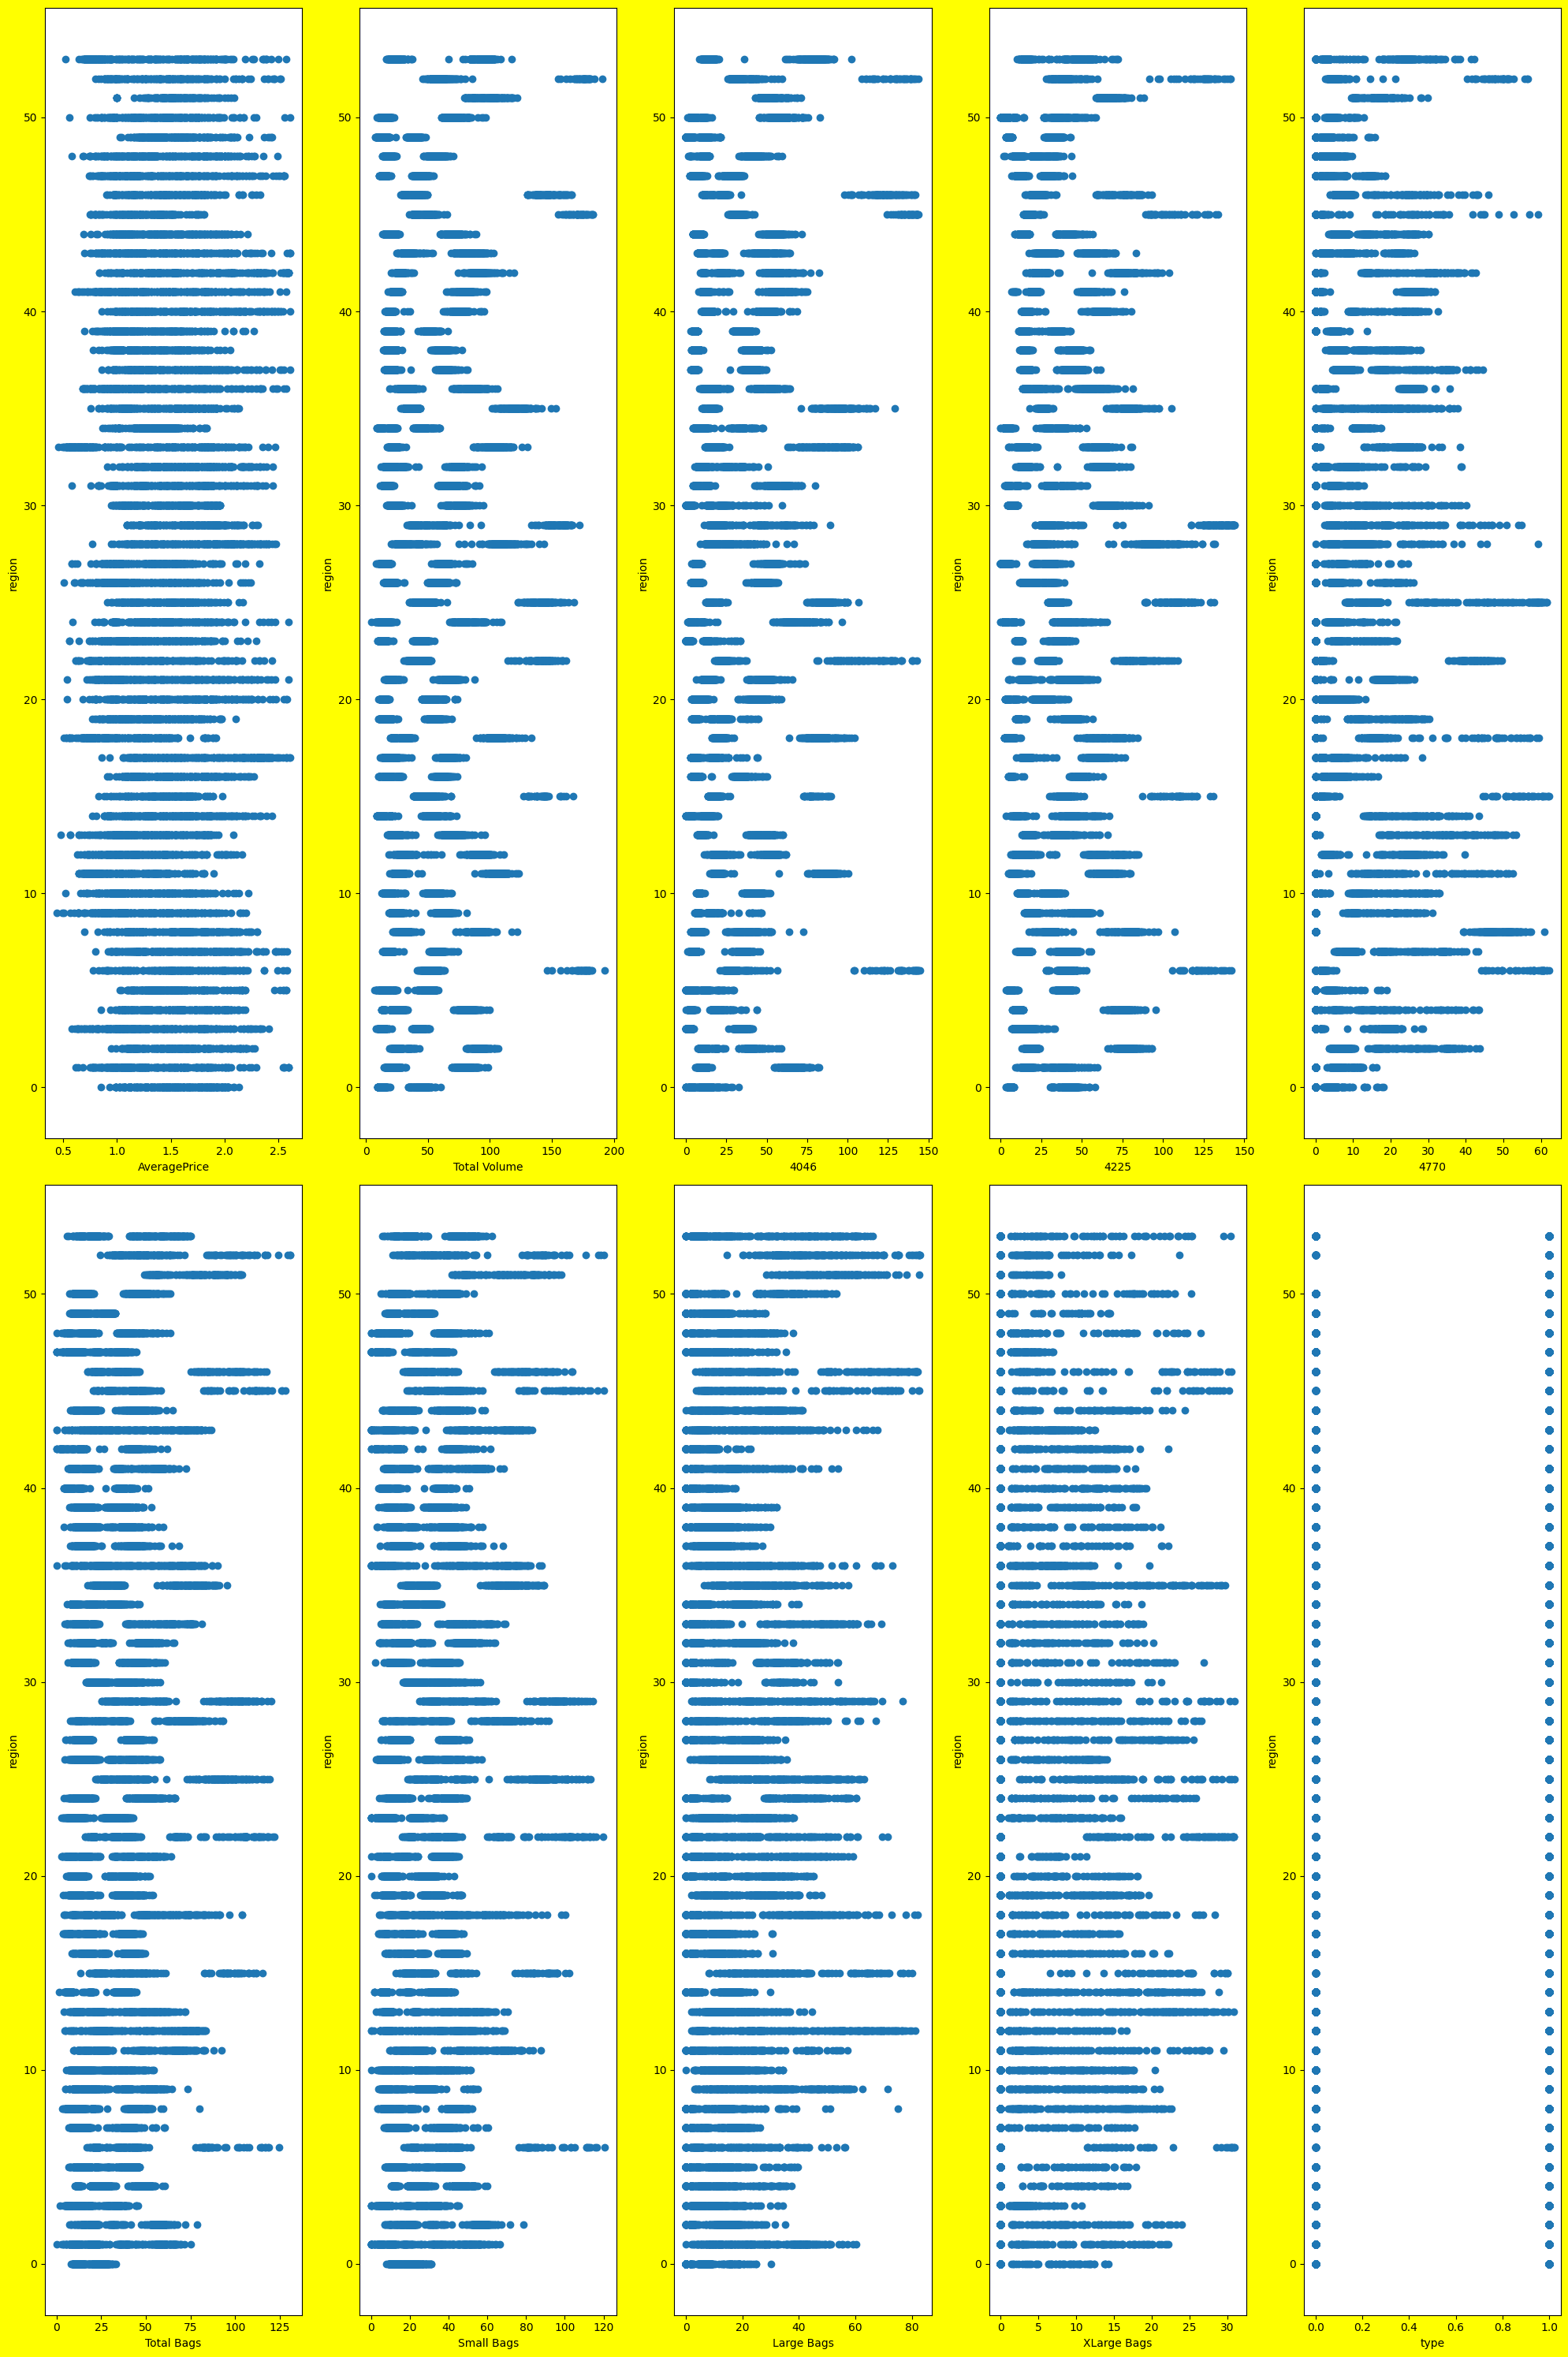

In [63]:
plt.figure(figsize=(20,30), facecolor= 'yellow')
plotnumber=1
for column in x:
    if plotnumber <=10:
        plt.subplot(2,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('region')
        plotnumber+=1
plt.tight_layout() 

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

vif       feature
0    28.215886  AveragePrice
1   551.797691  Total Volume
2    43.741476          4046
3    98.089163          4225
4     4.726058          4770
5   357.048950    Total Bags
6   180.409521    Small Bags
7    18.718289    Large Bags
8     2.132210   XLarge Bags
9     6.004787          type
10   39.612201          year

In [65]:
x=x.drop(columns='Total Volume')

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [67]:
print('sample distribution before SMOTE:',y.value_counts())
sm=SMOTE()


sample distribution before SMOTE: 0.0     338
16.0    338
49.0    338
44.0    338
39.0    338
38.0    338
34.0    338
32.0    338
30.0    338
26.0    338
23.0    338
19.0    338
27.0    338
4.0     338
5.0     338
8.0     338
2.0     338
10.0    338
9.0     338
11.0    337
20.0    337
1.0     337
40.0    336
41.0    336
28.0    336
33.0    336
50.0    336
24.0    335
18.0    335
31.0    335
12.0    334
14.0    334
21.0    333
35.0    333
48.0    333
7.0     332
53.0    331
13.0    331
17.0    331
36.0    330
3.0     329
37.0    328
47.0    328
43.0    326
25.0    315
42.0    301
29.0    276
22.0    274
46.0    273
45.0    218
52.0    213
6.0     211
15.0    211
51.0    169
Name: region, dtype: int64


In [68]:
x1,y1=sm.fit_resample(x,y)
print('**************************************************')
print('sample distribution after SMOTE:',y1.value_counts())

**************************************************
sample distribution after SMOTE: 0.0     338
40.0    338
29.0    338
30.0    338
31.0    338
32.0    338
33.0    338
34.0    338
35.0    338
36.0    338
37.0    338
38.0    338
39.0    338
41.0    338
1.0     338
42.0    338
43.0    338
44.0    338
45.0    338
46.0    338
47.0    338
48.0    338
49.0    338
50.0    338
52.0    338
53.0    338
28.0    338
27.0    338
26.0    338
25.0    338
2.0     338
3.0     338
4.0     338
5.0     338
6.0     338
7.0     338
8.0     338
9.0     338
10.0    338
11.0    338
12.0    338
13.0    338
14.0    338
15.0    338
16.0    338
17.0    338
18.0    338
19.0    338
20.0    338
21.0    338
22.0    338
23.0    338
24.0    338
51.0    338
Name: region, dtype: int64


In [69]:
max_accuracy=0
max_rs=0
for i in range (300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RF=RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 0.9211102994886778 on random state: 253


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=max_rs)

In [71]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
P_DTC=DTC.predict(x_test)
P_DTC_T=DTC.predict(x_train)
score_DTC=cross_val_score(DTC,x1,y1)
acc_dtc=accuracy_score(y_test,P_DTC)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_DTC))
print('cross_val_score=',score_DTC)
print('--------------------------------------------------------------------------------------')
cv_mean_dtc=score_DTC.mean()
print('--------------------------------------------------------------------------------------')
diff_dtc_score=accuracy_score(y_test,P_DTC)-score_DTC.mean()
print('difference between accuracy and cv_score is::',diff_dtc_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       117
         1.0       0.67      0.62      0.64       107
         2.0       0.87      0.86      0.86        99
         3.0       0.79      0.78      0.79       104
         4.0       0.90      0.86      0.88       118
         5.0       0.76      0.78      0.77        99
         6.0       0.95      0.97      0.96       102
         7.0       0.78      0.83      0.80       104
         8.0       0.94      0.92      0.93       108
         9.0       0.84      0.75      0.79       116
        10.0       0.66      0.71      0.68       110
        11.0       0.78      0.89      0.83       102
        12.0       0.78      0.76      0.77        91
        13.0       0.75      0.83      0.79        84
        14.0       0.80      0.74      0.77

In [72]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
P_ETC=ETC.predict(x_test)
P_ETC_T=ETC.predict(x_train)
score_ETC=cross_val_score(ETC,x1,y1)
acc_ETC=accuracy_score(y_test,P_ETC)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_ETC))
print('cross_val_score=',score_ETC)
print('--------------------------------------------------------------------------------------')
cv_mean_etc=score_ETC.mean()
print('--------------------------------------------------------------------------------------')
diff_etc_score=accuracy_score(y_test,P_ETC)-score_ETC.mean()
print('difference between accuracy and cv_score is::',diff_etc_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       117
         1.0       0.84      0.86      0.85       107
         2.0       0.95      0.99      0.97        99
         3.0       0.97      0.88      0.92       104
         4.0       0.96      0.98      0.97       118
         5.0       0.92      0.82      0.87        99
         6.0       0.98      1.00      0.99       102
         7.0       0.94      0.94      0.94       104
         8.0       0.99      0.99      0.99       108
         9.0       0.93      0.84      0.89       116
        10.0       0.90      0.88      0.89       110
        11.0       0.95      0.97      0.96       102
        12.0       0.98      0.97      0.97        91
        13.0       0.88      0.92      0.90        84
        14.0       0.95      0.96      0.95

In [73]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
P_GB=GB.predict(x_test)
P_GB_T=GB.predict(x_train)
score_GB=cross_val_score(GB,x1,y1)
acc_GB=accuracy_score(y_test,P_GB)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_GB))
print('cross_val_score=',score_GB)
print('--------------------------------------------------------------------------------------')
cv_mean_GB=score_GB.mean()
print('--------------------------------------------------------------------------------------')
diff_GB_score=accuracy_score(y_test,P_GB)-score_GB.mean()
print('difference between accuracy and cv_score is::',diff_GB_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       117
         1.0       0.78      0.71      0.75       107
         2.0       0.96      0.95      0.95        99
         3.0       0.85      0.83      0.84       104
         4.0       0.90      0.87      0.89       118
         5.0       0.83      0.76      0.79        99
         6.0       0.97      0.95      0.96       102
         7.0       0.84      0.86      0.85       104
         8.0       0.97      0.94      0.95       108
         9.0       0.91      0.74      0.82       116
        10.0       0.69      0.78      0.74       110
        11.0       0.86      0.86      0.86       102
        12.0       0.94      0.90      0.92        91
        13.0       0.82      0.83      0.83        84
        14.0       0.90      0.85      0.87

In [74]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
P_RF=RF.predict(x_test)
P_RF_T=RF.predict(x_train)
score_RF=cross_val_score(RF,x1,y1)
acc_RF=accuracy_score(y_test,P_RF)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_RF))
print('cross_val_score=',score_RF)
print('--------------------------------------------------------------------------------------')
cv_mean_RF=score_RF.mean()
print('--------------------------------------------------------------------------------------')
diff_RF_score=accuracy_score(y_test,P_RF)-score_RF.mean()
print('difference between accuracy and cv_score is::',diff_RF_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       117
         1.0       0.89      0.86      0.88       107
         2.0       0.96      0.96      0.96        99
         3.0       0.94      0.87      0.90       104
         4.0       0.97      0.98      0.97       118
         5.0       0.92      0.81      0.86        99
         6.0       0.98      0.99      0.99       102
         7.0       0.91      0.92      0.91       104
         8.0       1.00      0.98      0.99       108
         9.0       0.94      0.86      0.90       116
        10.0       0.85      0.87      0.86       110
        11.0       0.95      0.97      0.96       102
        12.0       0.98      0.96      0.97        91
        13.0       0.85      0.90      0.88        84
        14.0       0.94      0.94      0.94

In [75]:
SV=SVC()
SV.fit(x_train,y_train)
P_SV=SV.predict(x_test)
P_SV_T=SV.predict(x_train)
score_SV=cross_val_score(SV,x1,y1)
acc_SV=accuracy_score(y_test,P_SV)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_SV))
print('cross_val_score=',score_SV)
print('--------------------------------------------------------------------------------------')
cv_mean_SV=score_SV.mean()
print('--------------------------------------------------------------------------------------')
diff_SV_score=accuracy_score(y_test,P_SV)-score_SV.mean()
print('difference between accuracy and cv_score is::',diff_SV_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       117
         1.0       0.00      0.00      0.00       107
         2.0       0.00      0.00      0.00        99
         3.0       0.00      0.00      0.00       104
         4.0       0.00      0.00      0.00       118
         5.0       0.00      0.00      0.00        99
         6.0       0.00      0.00      0.00       102
         7.0       0.00      0.00      0.00       104
         8.0       0.00      0.00      0.00       108
         9.0       0.00      0.00      0.00       116
        10.0       0.00      0.00      0.00       110
        11.0       0.00      0.00      0.00       102
        12.0       0.00      0.00      0.00        91
        13.0       0.00      0.00      0.00        84
        14.0       0.00      0.00      0.00

In [76]:
KN=KNeighborsClassifier()
KN.fit(x_train,y_train)
P_KN=KN.predict(x_test)
P_KN_T=KN.predict(x_train)
score_KN=cross_val_score(KN,x1,y1)
acc_KN=accuracy_score(y_test,P_KN)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_KN))
print('cross_val_score=',score_KN)
print('--------------------------------------------------------------------------------------')
cv_mean_KN=score_KN.mean()
print('--------------------------------------------------------------------------------------')
diff_KN_score=accuracy_score(y_test,P_KN)-score_KN.mean()
print('difference between accuracy and cv_score is::',diff_KN_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       117
         1.0       0.74      0.80      0.77       107
         2.0       0.94      0.91      0.92        99
         3.0       0.80      0.83      0.81       104
         4.0       0.95      0.88      0.91       118
         5.0       0.87      0.69      0.77        99
         6.0       0.91      0.98      0.94       102
         7.0       0.83      0.90      0.87       104
         8.0       0.97      0.94      0.95       108
         9.0       0.82      0.76      0.79       116
        10.0       0.79      0.82      0.80       110
        11.0       0.88      0.90      0.89       102
        12.0       0.86      0.81      0.84        91
        13.0       0.76      0.85      0.80        84
        14.0       0.87      0.85      0.86

In [77]:
ml_compare=pd.DataFrame()
DT_C={'regressior_name':DTC,'CV_MEAN':cv_mean_dtc,'accuracy_score':acc_dtc,'acc-cv_diff':diff_dtc_score}
ET_C={'regressior_name':'Extra_tree_C','CV_MEAN':cv_mean_etc,'accuracy_score':acc_ETC,'acc-cv_diff':diff_etc_score}
RF_C={'regressior_name':'RandomForestClassifier','CV_MEAN':cv_mean_RF,'accuracy_score':acc_RF,'acc-cv_diff':diff_RF_score}
GB_C={'regressior_name':'gradient boost','CV_MEAN':cv_mean_GB,'accuracy_score':acc_GB,'acc-cv_diff':diff_GB_score}
KNN_C={'regressior_name':KN,'CV_MEAN':cv_mean_KN,'accuracy_score':acc_KN,'acc-cv_diff':diff_KN_score}
SV_C={'regressior_name':SV,'CV_MEAN':cv_mean_SV,'accuracy_score':acc_SV,'acc-cv_diff':diff_SV_score}
ml_compare=ml_compare.append([DT_C,ET_C,RF_C,GB_C,KNN_C,SV_C],ignore_index=True)
ml_compare=ml_compare.set_index(['regressior_name'])

<AxesSubplot:ylabel='regressior_name'>

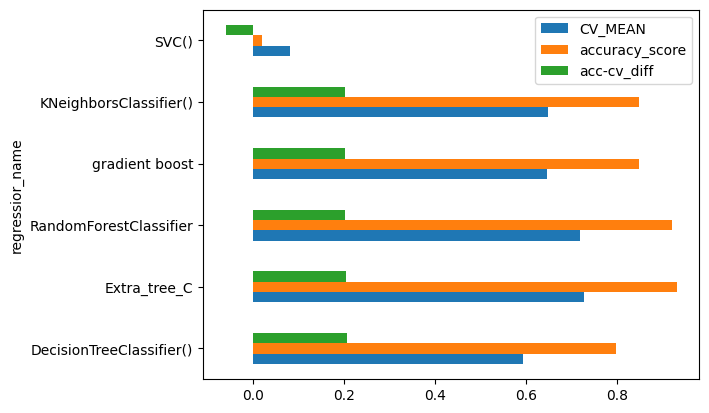

In [78]:
ml_compare.plot.barh()

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
p1={'criterion':['entropy','gini','log_loss'],'n_estimators':[100],'random_state':[100]}
GCV=GridSearchCV(RandomForestClassifier(),param_grid=p1,cv=5)
final=GCV.fit(x_train,y_train)
print(final.best_params_)

{'criterion': 'entropy', 'n_estimators': 100, 'random_state': 100}


In [81]:
final_model=RandomForestClassifier(
criterion= 'gini',n_estimators=100, 
random_state=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.00146092037984


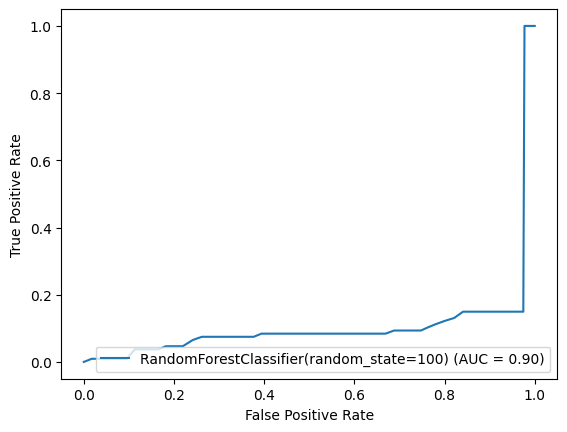

In [82]:
from sklearn import metrics
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(tpr,fpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [83]:
import pickle
file_name='AVOCADO_ANALYSIS_REGION.pkl'
pickle.dump(final_model,open(file_name,'wb'))

## REGRESSION ANALYSIS WITH 'AVERAGE PRICE'

In [84]:
x=avocado_z.drop(columns='AveragePrice')
y=avocado_z['AveragePrice']

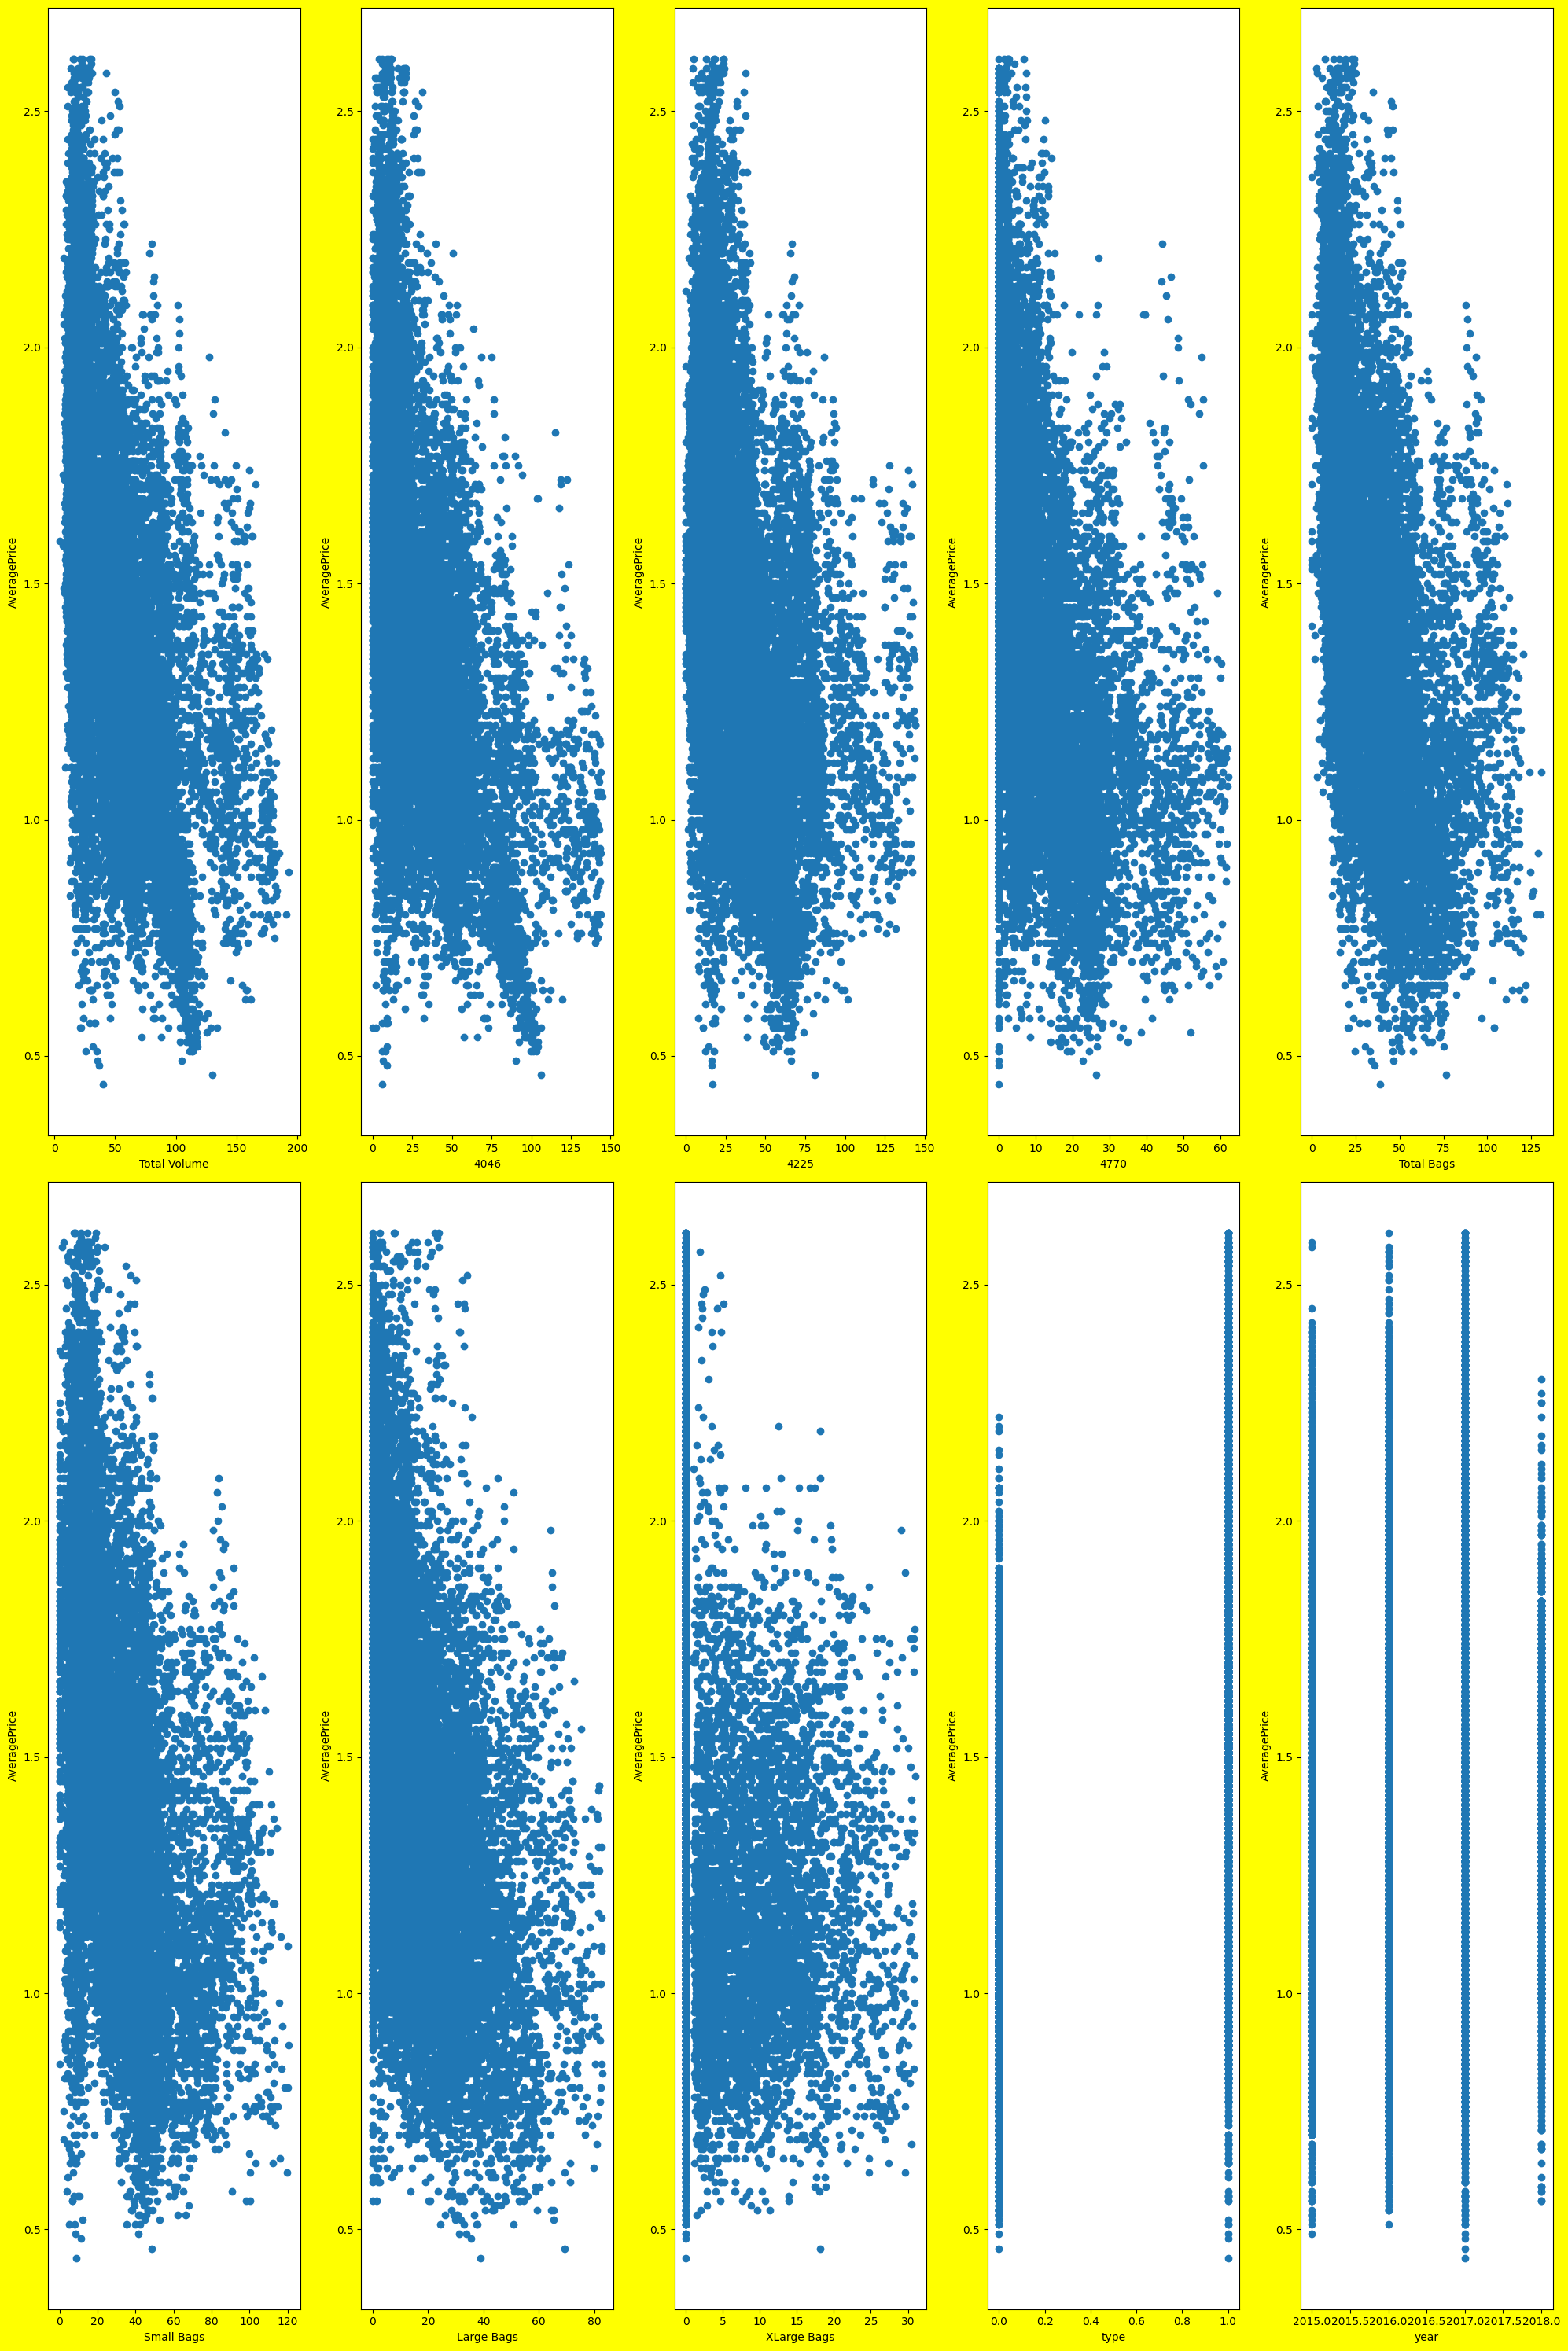

In [85]:
plt.figure(figsize=(20,30), facecolor= 'yellow')
plotnumber=1
for column in x:
    if plotnumber <=10:
        plt.subplot(2,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('AveragePrice')
        plotnumber+=1
plt.tight_layout() 

In [86]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

vif       feature
0   550.960933  Total Volume
1    45.885503          4046
2    95.133333          4225
3     4.718706          4770
4   350.887916    Total Bags
5   171.288828    Small Bags
6    18.503964    Large Bags
7     2.114957   XLarge Bags
8     5.007423          type
9    16.975144          year
10    4.293281        region

In [87]:
x=x.drop(columns='Total Volume')

In [88]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [89]:
max_accuracy=0
max_rs=0
for i in range (1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 0.5085239981614189 on random state: 683


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=max_rs)

In [91]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_LR_train=LR.predict(x_train)
r2t_LR=r2_score(y_test,pred_LR)
r2tr_LR=r2_score(y_train,pred_LR_train)
mab_error_LR=mean_absolute_error(y_test,pred_LR)
msq_error_LR=mean_squared_error(y_test,pred_LR)
root_error_LR=np.sqrt(mean_squared_error(y_test,pred_LR))
cv_score_LR=cross_val_score(LR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_LR)
print('avg:',cv_score_LR.mean())
r2_cv_LR=r2_score(y_test,pred_LR)-cv_score_LR.mean()

cv_score [-0.28123084  0.16120799  0.34425802  0.13520387  0.12407823]
avg: 0.0967034543052128


In [92]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_DTR_train=DTR.predict(x_train)
r2t_DTR=r2_score(y_test,pred_DTR)
r2tr_DTR=r2_score(y_train,pred_DTR_train)
mab_error_DTR=mean_absolute_error(y_test,pred_DTR)
msq_error_DTR=mean_squared_error(y_test,pred_DTR)
root_error_DTR=np.sqrt(mean_squared_error(y_test,pred_DTR))
cv_score_DTR=cross_val_score(DTR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_DTR)
print('avg:',cv_score_DTR.mean())
r2_cv_DTR=r2_score(y_test,pred_DTR)-cv_score_DTR.mean()

cv_score [-0.65218124 -0.19465319  0.15599087 -0.32074775 -0.27231743]
avg: -0.25678174775532947


In [93]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR=ETR.predict(x_test)
pred_ETR_train=ETR.predict(x_train)
r2t_ETR=r2_score(y_test,pred_ETR)
r2tr_ETR=r2_score(y_train,pred_ETR_train)
mab_error_ETR=mean_absolute_error(y_test,pred_ETR)
msq_error_ETR=mean_squared_error(y_test,pred_ETR)
root_error_ETR=np.sqrt(mean_squared_error(y_test,pred_ETR))
cv_score_ETR=cross_val_score(ETR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_ETR)
print('avg:',cv_score_ETR.mean())
r2_cv_ETR=r2_score(y_test,pred_ETR)-cv_score_ETR.mean()

cv_score [0.30622088 0.29175892 0.62615587 0.43142018 0.15263468]
avg: 0.3616381060126553


In [94]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_GBR_train=GBR.predict(x_train)
r2t_GBR=r2_score(y_test,pred_GBR)
r2tr_GBR=r2_score(y_train,pred_GBR_train)
mab_error_GBR=mean_absolute_error(y_test,pred_GBR)
msq_error_GBR=mean_squared_error(y_test,pred_GBR)
root_error_GBR=np.sqrt(mean_squared_error(y_test,pred_GBR))
cv_score_GBR=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_GBR)
print('avg:',cv_score_GBR.mean())
r2_cv_GBR=r2_score(y_test,pred_GBR)-cv_score_GBR.mean()

cv_score [0.27861888 0.35479561 0.57558242 0.38294081 0.13562225]
avg: 0.34551199460596926


In [95]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred_KNR=KNR.predict(x_test)
pred_KNR_train=KNR.predict(x_train)
r2t_KNR=r2_score(y_test,pred_KNR)
r2tr_KNR=r2_score(y_train,pred_KNR_train)
mab_error_KNR=mean_absolute_error(y_test,pred_KNR)
msq_error_KNR=mean_squared_error(y_test,pred_KNR)
root_error_KNR=np.sqrt(mean_squared_error(y_test,pred_KNR))
cv_score_KNR=cross_val_score(KNR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_KNR)
print('avg:',cv_score_KNR.mean())
r2_cv_KNR=r2_score(y_test,pred_KNR)-cv_score_KNR.mean()

cv_score [-0.69184465  0.30276309  0.4037306   0.14249994 -0.07054825]
avg: 0.01732014350247373


In [96]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_RFR_train=RFR.predict(x_train)
r2t_RFR=r2_score(y_test,pred_RFR)
r2tr_RFR=r2_score(y_train,pred_RFR_train)
mab_error_RFR=mean_absolute_error(y_test,pred_RFR)
msq_error_RFR=mean_squared_error(y_test,pred_RFR)
root_error_RFR=np.sqrt(mean_squared_error(y_test,pred_RFR))
cv_score_RFR=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_RFR)
print('avg:',cv_score_RFR.mean())
r2_cv_RFR=r2_score(y_test,pred_RFR)-cv_score_RFR.mean()

cv_score [0.22309488 0.34261479 0.58672686 0.43215164 0.0397992 ]
avg: 0.3248774724208341


In [97]:
ml_compare=pd.DataFrame()
data1={'regressior_name':LR,'r2_score_train':r2tr_LR,'r2_score_test':r2t_LR,'mean_absolute_error':mab_error_LR,'root_error':root_error_LR,'r2-cv':r2_cv_LR}
data2={'regressior_name':'DecisionTreeRegressor','r2_score_train':r2tr_DTR,'r2_score_test':r2t_DTR,'mean_absolute_error':mab_error_DTR,'root_error':root_error_DTR,'r2-cv':r2_cv_DTR}
data3={'regressior_name':'extra_tree_rgressior','r2_score_train':r2tr_ETR,'r2_score_test':r2t_ETR,'mean_absolute_error':mab_error_ETR,'root_error':root_error_ETR,'r2-cv':r2_cv_ETR}
data4={'regressior_name':KNR,'r2_score_train':r2tr_KNR,'r2_score_test':r2t_KNR,'mean_absolute_error':mab_error_KNR,'root_error':root_error_KNR,'r2-cv':r2_cv_KNR}
data5={'regressior_name':'Random Forest Regressior','r2_score_train':r2tr_RFR,'r2_score_test':r2t_RFR,'mean_absolute_error':mab_error_RFR,'root_error':root_error_RFR,'r2-cv':r2_cv_RFR}
data6={'regressior_name':'GradientBoostingRegressor','r2_score_train':r2tr_GBR,'r2_score_test':r2t_GBR,'mean_absolute_error':mab_error_GBR,'root_error':root_error_GBR,'r2-cv':r2_cv_GBR}
ml_compare=ml_compare.append([data1,data2,data3,data4,data5,data6],ignore_index=True)
ml_compare=ml_compare.set_index(['regressior_name'])

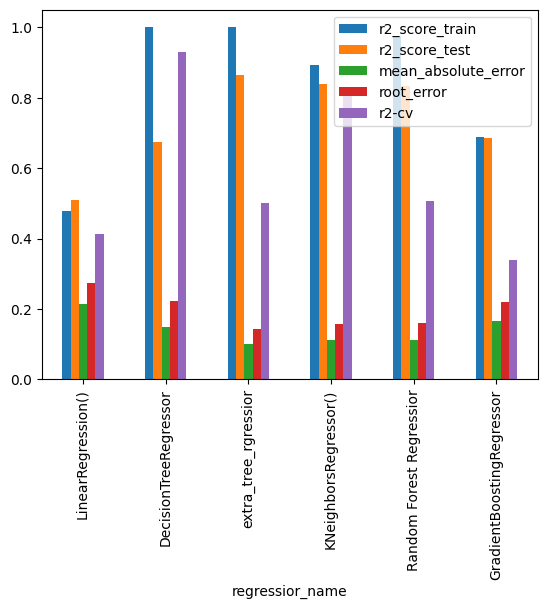

In [98]:
ml_compare.plot.bar()
plt.show()

In [99]:
pr={'n_estimators':[100],'criterion':['absolute_error','squared_error','friedman_mse','poisson'],'min_samples_split':[2],'random_state':[100]}

In [100]:
GCV=GridSearchCV(ExtraTreesRegressor(),param_grid=pr,cv=5)
final=GCV.fit(x_train,y_train)
print(final.best_params_)

{'criterion': 'friedman_mse', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 100}


In [101]:
finalmodel_c=ExtraTreesRegressor(n_estimators=100,criterion='friedman_mse',min_samples_split=2,random_state=100)
finalmodel_c.fit(x_train,y_train)
pred_final=finalmodel_c.predict(x_test)
r2_s=r2_score(y_test,pred_final)
print(r2_s)

0.8634582639201468


In [102]:
import pickle
file_name='AVOCADO_ANALYSIS_AVG_PRICE.pkl'
pickle.dump(finalmodel_c,open(file_name,'wb'))